<a href="https://colab.research.google.com/github/AndreiAf02/Job_Satisfaction_Burnout/blob/main/Job_Satisfaction_AT_Multi_Group_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install semopy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import semopy
from semopy.multigroup import multigroup
import math
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import bootstrap, norm
import pymc as pm

## Data Preprocessing:

In [ ]:
# path_to_data = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/02_processed/'
path_to_data2 = 'https://raw.githubusercontent.com/EduardoAve/Labour-well-being/refs/heads/main/data/01_raw-00/'

In [ ]:
data_total = pd.read_csv(path_to_data2+ "Final_Dataset.csv", sep=",", header=0)
data_total.columns = data_total.columns.str.replace(".","")

data_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,2,4,2.0,28.0,2.0,Spanish,3.0,1.0,1.0,1.0,...,4.0,4.0,3.0,4.0,1.0,4.0,1.0,3.0,5.0,4.0
1,2,4,1.0,33.0,2.0,German,2.0,1.0,1.0,3.0,...,5.0,5.0,4.0,4.0,3.0,3.0,2.0,2.0,5.0,4.0
2,2,4,2.0,32.0,2.0,Kosovan,3.0,1.0,NaN,5.0,...,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,5.0,3.0
3,2,4,NaN,30.0,2.0,Spain,2.0,1.0,1.0,5.0,...,4.0,5.0,1.0,5.0,2.0,4.0,2.0,3.0,3.0,4.0
4,2,4,1.0,39.0,2.0,Italian,2.0,2.0,1.0,5.0,...,5.0,5.0,3.0,3.0,3.0,2.0,4.0,4.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,1,1,1.0,27.0,4.0,NaN,2.0,1.0,4.0,1.0,...,2.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0
2743,1,1,1.0,80.0,3.0,NaN,1.0,1.0,4.0,6.0,...,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
2744,1,1,2.0,27.0,6.0,NaN,3.0,1.0,4.0,3.0,...,2.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,3.0,2.0
2745,1,1,2.0,28.0,4.0,NaN,3.0,1.0,4.0,1.0,...,5.0,4.0,4.0,4.0,3.0,3.0,3.0,1.0,4.0,NaN


In [ ]:
print(data_total.columns.tolist())

['Country', 'Version', '1 Gender:', '2 Age (in years):', 'Unnamed: 4', '3 Nationality:', '4 Current marital (partnership) status:', '5 Do you currently care for underage children or dependent relatives?', '6 The type of higher education insitution where you primarily work:', '7 Subject area of the faculty (higher education institution) where you primarily work:', '8 Duration of your current employment contract at the higher education institution where you primarily work:', '9 Extent of employment in higher education (in hours/week, aggregated for all higher education institutions where you work):', '10 Actual average weekly working hours in higher education (in a typical semester week):', 'Effort (less, more, equal)', 'Effort [%]', 'Income CZK', 'Income EURO', 'Euro Adj', 'Salary/hour', 'Salary effort/hour', '12 Do you hold a leadership position at a higher education institution?', '13 How influential are you in helping to shape key academic policies at your institution at the level of

In [ ]:
print(data_total['Salary/hour'][data_total['Income EURO']>=10**5])

1858    692.3076923076923
2037    576.9230769230769
2490    692.3076923076923
2499                  750
2538                  750
2559    692.3076923076923
2562    634.6153846153845
2583    576.9230769230769
Name: Salary/hour, dtype: object


In [ ]:
data_at_total = data_total[data_total['Country']==1].reset_index(drop=True)
# data_cz_total = data_total[data_total['Country']==2].reset_index(drop=True)
data_at_total

,Country,Version,1 Gender:,2 Age (in years):,Unnamed: 4,3 Nationality:,4 Current marital (partnership) status:,5 Do you currently care for underage children or dependent relatives?,6 The type of higher education insitution where you primarily work:,7 Subject area of the faculty (higher education institution) where you primarily work:,...,36 I tend to overwork,37 I don’t consider my work to be finished until I am completely satisfied with the result,38 My thoughts revolve around work almost exclusively,"39 When I’m unsuccessful at work, it makes me feel very down","40 If I don’t succeed at something, that just makes me all the more determined",41 I can be calm and collected in almost all situations,42 My life up till now has been characterized by professional success,"43 By and large, I am happy and content",44 I have the full support of my family,Vulnerability
0,1,3,1.0,47.0,7.0,Hungary,1.0,2.0,5.0,5.0,...,4.0,2.0,3.0,3.0,3.0,4.0,5.0,5.0,5.0,3.0
1,1,3,2.0,35.0,NaN,NaN,1.0,2.0,6.0,2.0,...,4.0,4.0,4.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0
2,1,3,1.0,51.0,7.0,Australian,3.0,1.0,4.0,5.0,...,4.0,2.0,4.0,5.0,2.0,5.0,3.0,4.0,4.0,4.0
3,1,3,1.0,34.0,7.0,Belgian,2.0,1.0,4.0,7.0,...,2.0,4.0,1.0,4.0,3.0,3.0,4.0,4.0,4.0,4.0
4,1,3,2.0,29.0,7.0,Ecuadorian,2.0,1.0,4.0,2.0,...,4.0,4.0,1.0,4.0,4.0,3.0,4.0,4.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,1,1,1.0,27.0,4.0,NaN,2.0,1.0,4.0,1.0,...,2.0,4.0,2.0,3.0,2.0,3.0,4.0,3.0,4.0,2.0
1324,1,1,1.0,80.0,3.0,NaN,1.0,1.0,4.0,6.0,...,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
1325,1,1,2.0,27.0,6.0,NaN,3.0,1.0,4.0,3.0,...,2.0,3.0,1.0,1.0,3.0,3.0,5.0,5.0,3.0,2.0
1326,1,1,2.0,28.0,4.0,NaN,3.0,1.0,4.0,1.0,...,5.0,4.0,4.0,4.0,3.0,3.0,3.0,1.0,4.0,NaN


In [ ]:
data_at_job = data_at_total[['2 Age (in years):',
    'AT_15 Your current position at the higher education institution, where you primarily work: ', ## Current Position
    'Salary/hour',
    # '8 Duration of your current employment contract at the higher education institution where you primarily work:', ## Contract Duration
    '10 Actual average weekly working hours in higher education (in a typical semester week):', ## Actual Weekly Working Hours
    'Effort [%]', ## Effort = actual hours/contract hours
    '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)', ## Teaching hours
    '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)', ## Research Hours
    '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)', ## Research Admin hours
    '4 Organisational and administrative activities (organising and attending meetings, dealing with tasks and documents not directly related to teaching, research, or externally funded research projects, etc)', ## General Admin hours
    # '12 Do you hold a leadership position at a higher education institution?', ## Leadership position
    '13 How influential are you in helping to shape key academic policies at your institution at the level of department or similar unit?', ## Policy Influence
    ## ACADEMIC RESOURCES:
    '1 Facilities and technological equipment (offices, classrooms, laboratories, computers, projectors, teaching software)', ## Academic Resources - FACILITIES
    '2 Research equipment (instruments, tools, materials, software for working with data)', ## Academic Resources - RESEARCH EQUIP
    '3 Availability of scientific literature (access to up-to-date scientific articles and books)', ## Academic Resources - LITERATURE
    '4 Personnel support (support from secretarial, administrative and technical staff, laboratory technicians, etc)', ## Academic Resources - SUPPORT
    '5 Opportunities for personal and professional development (offer and availability of professional courses and internships, opportunities to participate at conferences and other professional events)', ## Academic Resources - PD
    '6 Availability of resources for research funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    # '1 At my institution, there is a strong performance orientation',
    ## PERCEIVED AUTONOMY:
    '2 I feel like I can be myself at my job', ## KEEP ORDER
    "3 At work, I often feel like I have to follow other people’s commands", ## TO INVERT
    '4 If I could choose, I would do things at work differently', ## TO INVERT
    '5 The tasks I have to do at work are in line with what I really want to do', ## KEEP ORDER
    '6 I feel free to do my job the way I think it could best be done', ## KEEP ORDER
    '7 In my job, I feel forced to do things I do not want to do ', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    # '1  makes sure that the members of staff have good development opportunities', ## KEEP ORDER
    # '2  gives high priority to job satisfaction', ## KEEP ORDER
    # '3  is good at work planning', ## KEEP ORDER
    # '4  is good at solving conflicts ', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    # '1 There is a good atmosphere between myself and my colleagues ',
    # '2 There is good co-operation between the colleagues at work',
    # '3 I feel part of a community at my place of work',
    ## JOB SATISFACTION:
    '1  your work prospects? ',
    '2   the physical working conditions (eg facilities, equipment, physical working environment)?',
    '3  the way your abilities are used?',
    '4  your salary?',
    '5  your job as a whole, everything taken into consideration? ',
    ## BURNOUT:
    '1 How often have you felt worn out?',
    '2 How often have you been physically exhausted?',
    '3 How often have you been emotionally exhausted?',
    '4 How often have you felt tired?'
]]

In [ ]:
data_at_job.columns.tolist()

['2 Age (in years):',
 'AT_15 Your current position at the higher education institution, where you primarily work: ',
 'Salary/hour',
 '10 Actual average weekly working hours in higher education (in a typical semester week):',
 'Effort [%]',
 '1 Teaching (classroom instruction, preparation of instructional materials and lesson plans, advising students, reading and evaluating student work, examination management, etc)',
 '2 Research (reading literature, designing and conducting experiments, collecting and analysing data, writing articles or other scientific texts, etc)',
 '3 Activities related to externally funded research projects (searching for information on available funding sources, preparation of grant applications and project reports, project management and administration, etc)',
 '4 Organisational and administrative activities (organising and attending meetings, dealing with tasks and documents not directly related to teaching, research, or externally funded research projects, e

In [ ]:
data_at_job.columns = ['Age',
    'Current_position', ## Current Position
    'Salary',
    # 'Contract_duration', ## Contract Duration
    'Actual_hrs', ## Actual Weekly Working Hours
    'Effort', ## Effort = actual hours/contract hours
    'Teaching_hrs', ## Teaching hours
    'Research_hrs', ## Research Hours
    'External_funding_hrs', ## External Research Funding hours
    'Admin_hrs', ## General Admin hours
    # 'Leadership_position', ## Leadership position
    'Policy_influence', ## Policy Influence
    ## ACADEMIC RESOURCES:
    'Acad_res_facility', ## Academic Resources - FACILITIES
    'Acad_res_equip', ## Academic Resources - RESEARCH EQUIP
    'Acad_res_lit', ## Academic Resources - LITERATURE
    'Acad_res_support', ## Academic Resources - SUPPORT
    'Acad_res_PD', ## Academic Resources - PD
    'Acad_res_funding', ## Academic Resources - FUNDING
    ## PERFORMANCE PRESSURE:
    # 'Performance_pressure',
    ## PERCEIVED AUTONOMY:
    'Be_myself', ## KEEP ORDER
    "Follow_commands", ## TO INVERT
    'Do_differently', ## TO INVERT
    'Want_to_do', ## KEEP ORDER
    'Done_best', ## KEEP ORDER
    'Forced_to_do', ## TO INVERT
    ## QUALITY OF LEADERSHIP:
    # 'Development_opportunities', ## KEEP ORDER
    # 'Prioritizes_satisfaction', ## KEEP ORDER
    # 'Work_planning', ## KEEP ORDER
    # 'Solving_conflicts', ## KEEP ORDER
    ## SENSE OF COMMUNITY:
    # 'Good_atmosphere',
    # 'Good_cooperation',
    # 'Part_of_community',
    ## JOB SATISFACTION:
    'Work_prospects',
    'Physical_working_conditions',
    'Use_of_abilities',
    'Satisfaction_w_salary',
    'Overall_satisfaction',
    ## BURNOUT:
    'Worn_out',
    'Physically_exhausted',
    'Emotionally_exhausted',
    'Felt_tired']

In [ ]:
data_at_job.columns.tolist()

['Age',
 'Current_position',
 'Salary',
 'Actual_hrs',
 'Effort',
 'Teaching_hrs',
 'Research_hrs',
 'External_funding_hrs',
 'Admin_hrs',
 'Policy_influence',
 'Acad_res_facility',
 'Acad_res_equip',
 'Acad_res_lit',
 'Acad_res_support',
 'Acad_res_PD',
 'Acad_res_funding',
 'Be_myself',
 'Follow_commands',
 'Do_differently',
 'Want_to_do',
 'Done_best',
 'Forced_to_do',
 'Work_prospects',
 'Physical_working_conditions',
 'Use_of_abilities',
 'Satisfaction_w_salary',
 'Overall_satisfaction',
 'Worn_out',
 'Physically_exhausted',
 'Emotionally_exhausted',
 'Felt_tired']

In [ ]:
data_at_job = data_at_job.dropna(subset=['Age']).reset_index(drop=True)
data_at_job = data_at_job[~(data_at_job == '#VALUE!').any(axis=1)]
for col in data_at_job.columns:
  data_at_job[col] = data_at_job[col].astype(str).str.replace(',', '.').astype(float)
data_at_job.to_csv('data_at_job.csv')
data_at_job

,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,Policy_influence,...,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction,Worn_out,Physically_exhausted,Emotionally_exhausted,Felt_tired
0,47.0,2.0,86.538462,40.0,100.000000,12.0,6.0,6.0,16.0,4.0,...,2.0,4.0,5.0,5.0,5.0,5.0,4.0,3.0,3.0,4.0
1,35.0,8.0,22.788462,45.0,112.500000,NaN,35.0,10.0,NaN,1.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0
2,51.0,13.0,20.192308,40.0,100.000000,0.0,10.0,10.0,80.0,2.0,...,5.0,4.0,3.0,1.0,1.0,2.0,4.0,4.0,4.0,4.0
3,34.0,8.0,17.884615,50.0,125.000000,15.0,30.0,2.0,5.0,3.0,...,2.0,2.0,5.0,4.0,4.0,4.0,3.0,2.0,3.0,2.0
4,29.0,11.0,26.373626,35.0,100.000000,1.0,20.0,9.0,5.0,1.0,...,4.0,3.0,2.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,27.0,9.0,18.907500,35.0,116.666667,0.0,25.0,1.0,4.0,2.0,...,4.0,4.0,4.0,2.0,1.0,2.0,5.0,4.0,4.0,4.0
1311,80.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,2.0,4.0,4.0,4.0,3.0,3.0,2.0,3.0,3.0,3.0
1312,27.0,9.0,22.061538,30.0,100.000000,0.0,25.0,0.0,5.0,1.0,...,1.0,2.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0
1313,28.0,9.0,13.461538,42.0,116.666667,2.0,40.0,0.0,0.0,1.0,...,4.0,1.0,2.0,2.0,1.0,2.0,4.0,4.0,4.0,4.0


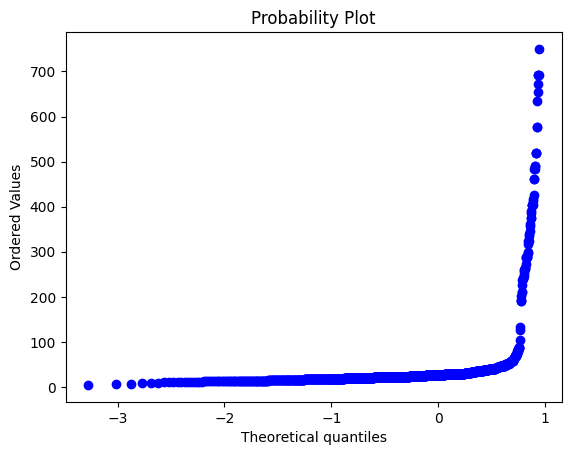

In [ ]:
stats.probplot(data_at_job['Salary'], dist="norm", plot=plt)
plt.show()

In [ ]:
Q1_salary = data_at_job['Salary'].quantile(0.25)
Q3_salary = data_at_job['Salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

lower_bound_salary = Q1_salary - 3. * IQR_salary
upper_bound_salary = Q3_salary + 2.8 * IQR_salary

Q1_hrs = data_at_job['Actual_hrs'].quantile(0.25)
Q3_hrs = data_at_job['Actual_hrs'].quantile(0.75)
IQR_hrs = Q3_hrs - Q1_hrs

lower_bound_hrs = Q1_hrs - 3. * IQR_hrs
upper_bound_hrs = Q3_hrs + 3. * IQR_hrs

Q1_effort = data_at_job['Effort'].quantile(0.25)
Q3_effort = data_at_job['Effort'].quantile(0.75)
IQR_effort = Q3_effort - Q1_effort

lower_bound_effort = Q1_effort - 3. * IQR_effort
upper_bound_effort = Q3_effort + 3. * IQR_effort




data_at_job = data_at_job[(data_at_job['Salary'] > lower_bound_salary) & (data_at_job['Salary'] < upper_bound_salary) &
                          (data_at_job['Actual_hrs'] > lower_bound_hrs) & (data_at_job['Actual_hrs'] < upper_bound_hrs) &
                           (data_at_job['Effort'] > lower_bound_effort) & (data_at_job['Effort'] < upper_bound_effort)].reset_index(drop=True)

data_at_job

,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,Policy_influence,...,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction,Worn_out,Physically_exhausted,Emotionally_exhausted,Felt_tired
0,35.0,8.0,22.788462,45.0,112.500000,NaN,35.0,10.0,NaN,1.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0
1,51.0,13.0,20.192308,40.0,100.000000,0.0,10.0,10.0,80.0,2.0,...,5.0,4.0,3.0,1.0,1.0,2.0,4.0,4.0,4.0,4.0
2,34.0,8.0,17.884615,50.0,125.000000,15.0,30.0,2.0,5.0,3.0,...,2.0,2.0,5.0,4.0,4.0,4.0,3.0,2.0,3.0,2.0
3,29.0,11.0,26.373626,35.0,100.000000,1.0,20.0,9.0,5.0,1.0,...,4.0,3.0,2.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0
4,41.0,10.0,21.923077,40.0,100.000000,35.0,5.0,0.0,5.0,3.0,...,1.0,3.0,4.0,2.0,2.0,3.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,40.0,11.0,25.961538,40.0,100.000000,20.0,20.0,NaN,NaN,1.0,...,1.0,5.0,1.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
942,27.0,9.0,18.907500,35.0,116.666667,0.0,25.0,1.0,4.0,2.0,...,4.0,4.0,4.0,2.0,1.0,2.0,5.0,4.0,4.0,4.0
943,27.0,9.0,22.061538,30.0,100.000000,0.0,25.0,0.0,5.0,1.0,...,1.0,2.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0
944,28.0,9.0,13.461538,42.0,116.666667,2.0,40.0,0.0,0.0,1.0,...,4.0,1.0,2.0,2.0,1.0,2.0,4.0,4.0,4.0,4.0


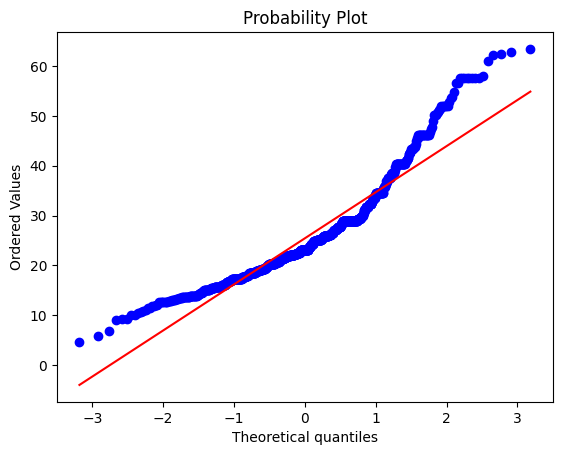

In [ ]:
stats.probplot(data_at_job['Salary'], dist="norm", plot=plt)
plt.show()

In [ ]:
data_at_job

,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,Policy_influence,...,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction,Worn_out,Physically_exhausted,Emotionally_exhausted,Felt_tired
0,35.0,8.0,22.788462,45.0,112.500000,NaN,35.0,10.0,NaN,1.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0
1,51.0,13.0,20.192308,40.0,100.000000,0.0,10.0,10.0,80.0,2.0,...,5.0,4.0,3.0,1.0,1.0,2.0,4.0,4.0,4.0,4.0
2,34.0,8.0,17.884615,50.0,125.000000,15.0,30.0,2.0,5.0,3.0,...,2.0,2.0,5.0,4.0,4.0,4.0,3.0,2.0,3.0,2.0
3,29.0,11.0,26.373626,35.0,100.000000,1.0,20.0,9.0,5.0,1.0,...,4.0,3.0,2.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0
4,41.0,10.0,21.923077,40.0,100.000000,35.0,5.0,0.0,5.0,3.0,...,1.0,3.0,4.0,2.0,2.0,3.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,40.0,11.0,25.961538,40.0,100.000000,20.0,20.0,NaN,NaN,1.0,...,1.0,5.0,1.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
942,27.0,9.0,18.907500,35.0,116.666667,0.0,25.0,1.0,4.0,2.0,...,4.0,4.0,4.0,2.0,1.0,2.0,5.0,4.0,4.0,4.0
943,27.0,9.0,22.061538,30.0,100.000000,0.0,25.0,0.0,5.0,1.0,...,1.0,2.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0
944,28.0,9.0,13.461538,42.0,116.666667,2.0,40.0,0.0,0.0,1.0,...,4.0,1.0,2.0,2.0,1.0,2.0,4.0,4.0,4.0,4.0


In [ ]:
np.sort(data_at_job['Current_position'].unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.])

In [ ]:
data_at_job

,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,Policy_influence,...,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction,Worn_out,Physically_exhausted,Emotionally_exhausted,Felt_tired
0,35.0,8.0,22.788462,45.0,112.500000,NaN,35.0,10.0,NaN,1.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0
1,51.0,13.0,20.192308,40.0,100.000000,0.0,10.0,10.0,80.0,2.0,...,5.0,4.0,3.0,1.0,1.0,2.0,4.0,4.0,4.0,4.0
2,34.0,8.0,17.884615,50.0,125.000000,15.0,30.0,2.0,5.0,3.0,...,2.0,2.0,5.0,4.0,4.0,4.0,3.0,2.0,3.0,2.0
3,29.0,11.0,26.373626,35.0,100.000000,1.0,20.0,9.0,5.0,1.0,...,4.0,3.0,2.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0
4,41.0,10.0,21.923077,40.0,100.000000,35.0,5.0,0.0,5.0,3.0,...,1.0,3.0,4.0,2.0,2.0,3.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,40.0,11.0,25.961538,40.0,100.000000,20.0,20.0,NaN,NaN,1.0,...,1.0,5.0,1.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
942,27.0,9.0,18.907500,35.0,116.666667,0.0,25.0,1.0,4.0,2.0,...,4.0,4.0,4.0,2.0,1.0,2.0,5.0,4.0,4.0,4.0
943,27.0,9.0,22.061538,30.0,100.000000,0.0,25.0,0.0,5.0,1.0,...,1.0,2.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0
944,28.0,9.0,13.461538,42.0,116.666667,2.0,40.0,0.0,0.0,1.0,...,4.0,1.0,2.0,2.0,1.0,2.0,4.0,4.0,4.0,4.0


In [ ]:
## Interpolating the missing answer data using averages from each job position:
data_at_job_interpolated = data_at_job
data_at_job_interpolated.columns

for i in range(len(data_at_job_interpolated.columns)-3):
  for j in np.sort(data_at_job_interpolated['Current_position'].unique()):
    interpolation = data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][data_at_job_interpolated['Current_position']== j].mean()
    print('Interpolated Value:', interpolation)
    data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
    & (data_at_job_interpolated['Current_position']== j)] = interpolation

data_at_job_interpolated.to_csv('data_at_job_interpolated.csv')
data_at_job_interpolated



Interpolated Value: 20.067036578088498
Interpolated Value: 41.381715958294905
Interpolated Value: 36.06349532820121
Interpolated Value: 29.13871705217858
Interpolated Value: 38.9467032967033
Interpolated Value: 33.58947173516139
Interpolated Value: 32.728575174825174
Interpolated Value: 26.590242448900938
Interpolated Value: 21.2324724750927
Interpolated Value: 25.543949266777176
Interpolated Value: 21.390911119408155
Interpolated Value: 29.87210326941991
Interpolated Value: 21.769152732654753
Interpolated Value: 35.611111111111114
Interpolated Value: 48.14912280701754
Interpolated Value: 41.38235294117647
Interpolated Value: 45.51136363636363
Interpolated Value: 49.333333333333336
Interpolated Value: 46.62068965517241
Interpolated Value: 46.11363636363637
Interpolated Value: 43.1042735042735
Interpolated Value: 39.27717391304348
Interpolated Value: 37.55625
Interpolated Value: 36.42338709677419
Interpolated Value: 25.348837209302324
Interpolated Value: 32.265625
Interpolated Value: 10

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: nan
Interpolated Value: 13.446428571428571
Interpolated Value: 12.058823529411764
Interpolated Value: 13.931818181818182
Interpolated Value: 12.023809523809524
Interpolated Value: 12.572413793103449
Interpolated Value: 10.0
Interpolated Value: 7.025862068965517
Interpolated Value: 5.856617647058823
Interpolated Value: 6.898058252427185
Interpolated Value: 6.046610169491525
Interpolated Value: 4.591428571428571
Interpolated Value: 10.290322580645162
Interpolated Value: 1.8737373737373737
Interpolated Value: 3.491228070175439
Interpolated Value: 3.0
Interpolated Value: 2.0681818181818183
Interpolated Value: 2.857142857142857
Interpolated Value: 2.689655172413793
Interpolated Value: 2.4545454545454546
Interpolated Value: 1.7264957264957266
Interpolated Value: 1.6594202898550725
Interpolated Value: 2.2211538461538463
Interpolated Value: 1.653225806451613
Interpolated Value: 2.0
Interpolated Value: 1.9375
Interpolated Value: nan
Interpolated Value: 3.912280701754386
Inte

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 3.547008547008547
Interpolated Value: 3.739130434782609
Interpolated Value: 3.4466019417475726
Interpolated Value: 3.5040650406504064
Interpolated Value: 3.186046511627907
Interpolated Value: 3.34375
Interpolated Value: nan
Interpolated Value: 2.8392857142857144
Interpolated Value: 2.3333333333333335
Interpolated Value: 2.35
Interpolated Value: 2.210526315789474
Interpolated Value: 2.310344827586207
Interpolated Value: 2.5238095238095237
Interpolated Value: 2.626086956521739
Interpolated Value: 2.814814814814815
Interpolated Value: 2.536082474226804
Interpolated Value: 2.823529411764706
Interpolated Value: 2.3333333333333335
Interpolated Value: 2.3666666666666667
Interpolated Value: 3.4263959390862944
Interpolated Value: 3.6315789473684212
Interpolated Value: 3.4705882352941178
Interpolated Value: 3.3863636363636362
Interpolated Value: 3.7142857142857144
Interpolated Value: 3.3448275862068964
Interpolated Value: 3.3181818181818183
Interpolated Value: 3.3247863247863

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

Interpolated Value: 3.272727272727273
Interpolated Value: 3.9523809523809526
Interpolated Value: 3.8275862068965516
Interpolated Value: 3.8181818181818183
Interpolated Value: 3.752136752136752
Interpolated Value: 3.72992700729927
Interpolated Value: 3.701923076923077
Interpolated Value: 3.4146341463414633
Interpolated Value: 3.5813953488372094
Interpolated Value: 3.71875
Interpolated Value: 3.2588832487309647
Interpolated Value: 3.7017543859649122
Interpolated Value: 3.235294117647059
Interpolated Value: 3.477272727272727
Interpolated Value: 3.3333333333333335
Interpolated Value: 3.3448275862068964
Interpolated Value: 3.409090909090909
Interpolated Value: 3.5042735042735043
Interpolated Value: 3.27007299270073
Interpolated Value: 3.355769230769231
Interpolated Value: 3.4274193548387095
Interpolated Value: 3.380952380952381
Interpolated Value: 3.34375
Interpolated Value: 2.8527918781725887
Interpolated Value: 3.8947368421052633
Interpolated Value: 3.3529411764705883
Interpolated Value: 

/tmp/ipython-input-468727145.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_at_job_interpolated[data_at_job_interpolated.columns[i+2]][(data_at_job_interpolated[data_at_job_interpolated.columns[i+2]].isna())
/tmp/ipython-input-4687

,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,Policy_influence,...,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction,Worn_out,Physically_exhausted,Emotionally_exhausted,Felt_tired
0,35.0,8.0,22.788462,45.0,112.500000,9.043103,35.0,10.000000,7.025862,1.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0
1,51.0,13.0,20.192308,40.0,100.000000,0.000000,10.0,10.000000,80.000000,2.0,...,5.0,4.0,3.0,1.0,1.0,2.0,4.0,4.0,4.0,4.0
2,34.0,8.0,17.884615,50.0,125.000000,15.000000,30.0,2.000000,5.000000,3.0,...,2.0,2.0,5.0,4.0,4.0,4.0,3.0,2.0,3.0,2.0
3,29.0,11.0,26.373626,35.0,100.000000,1.000000,20.0,9.000000,5.000000,1.0,...,4.0,3.0,2.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0
4,41.0,10.0,21.923077,40.0,100.000000,35.000000,5.0,0.000000,5.000000,3.0,...,1.0,3.0,4.0,2.0,2.0,3.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,40.0,11.0,25.961538,40.0,100.000000,20.000000,20.0,6.452174,6.046610,1.0,...,1.0,5.0,1.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
942,27.0,9.0,18.907500,35.0,116.666667,0.000000,25.0,1.000000,4.000000,2.0,...,4.0,4.0,4.0,2.0,1.0,2.0,5.0,4.0,4.0,4.0
943,27.0,9.0,22.061538,30.0,100.000000,0.000000,25.0,0.000000,5.000000,1.0,...,1.0,2.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0
944,28.0,9.0,13.461538,42.0,116.666667,2.000000,40.0,0.000000,0.000000,1.0,...,4.0,1.0,2.0,2.0,1.0,2.0,4.0,4.0,4.0,4.0


In [ ]:
## PERCEIVED AUTONOMY:
inversion_list = ['Follow_commands', ## TO INVERT
                  'Do_differently', ## TO INVERT
                  'Forced_to_do'] ## TO INVERT

data_at_job_w_inversion = data_at_job_interpolated


for col in inversion_list:
  print('Before:', col, ":", np.sort(data_at_job_w_inversion[col].unique()))
  data_at_job_w_inversion[col] = max(data_at_job_w_inversion[col])+1 - data_at_job_w_inversion[col]
  print(col, ":", np.sort(data_at_job_w_inversion[col].unique()))

data_at_job_w_inversion.to_csv('data_at_job_w_inversion.csv')
data_at_job_w_inversion



Before: Follow_commands : [1. 2. 3. 4. 5.]
Follow_commands : [1. 2. 3. 4. 5.]
Before: Do_differently : [1.         2.         3.         3.25       3.37209302 3.41747573
 4.         5.        ]
Do_differently : [1.         2.         2.58252427 2.62790698 2.75       3.
 4.         5.        ]
Before: Forced_to_do : [1.         2.         2.38834951 2.7810219  3.         4.
 5.        ]
Forced_to_do : [1.         2.         3.         3.2189781  3.61165049 4.
 5.        ]


,Age,Current_position,Salary,Actual_hrs,Effort,Teaching_hrs,Research_hrs,External_funding_hrs,Admin_hrs,Policy_influence,...,Forced_to_do,Work_prospects,Physical_working_conditions,Use_of_abilities,Satisfaction_w_salary,Overall_satisfaction,Worn_out,Physically_exhausted,Emotionally_exhausted,Felt_tired
0,35.0,8.0,22.788462,45.0,112.500000,9.043103,35.0,10.000000,7.025862,1.0,...,4.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0
1,51.0,13.0,20.192308,40.0,100.000000,0.000000,10.0,10.000000,80.000000,2.0,...,1.0,4.0,3.0,1.0,1.0,2.0,4.0,4.0,4.0,4.0
2,34.0,8.0,17.884615,50.0,125.000000,15.000000,30.0,2.000000,5.000000,3.0,...,4.0,2.0,5.0,4.0,4.0,4.0,3.0,2.0,3.0,2.0
3,29.0,11.0,26.373626,35.0,100.000000,1.000000,20.0,9.000000,5.000000,1.0,...,2.0,3.0,2.0,3.0,3.0,3.0,4.0,3.0,4.0,4.0
4,41.0,10.0,21.923077,40.0,100.000000,35.000000,5.0,0.000000,5.000000,3.0,...,5.0,3.0,4.0,2.0,2.0,3.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,40.0,11.0,25.961538,40.0,100.000000,20.000000,20.0,6.452174,6.046610,1.0,...,5.0,5.0,1.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
942,27.0,9.0,18.907500,35.0,116.666667,0.000000,25.0,1.000000,4.000000,2.0,...,2.0,4.0,4.0,2.0,1.0,2.0,5.0,4.0,4.0,4.0
943,27.0,9.0,22.061538,30.0,100.000000,0.000000,25.0,0.000000,5.000000,1.0,...,5.0,2.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0
944,28.0,9.0,13.461538,42.0,116.666667,2.000000,40.0,0.000000,0.000000,1.0,...,2.0,1.0,2.0,2.0,1.0,2.0,4.0,4.0,4.0,4.0


In [ ]:
data_at_formatted = data_at_job_w_inversion

data_at_formatted = data_at_formatted.dropna(subset = ['Overall_satisfaction']).reset_index(drop=True)


## Calculating percentage hours for teaching and research:
data_at_formatted['Teaching_percent'] = data_at_formatted['Teaching_hrs']/data_at_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_at_formatted['Research_percent'] = data_at_formatted['Research_hrs']/data_at_formatted[['Teaching_hrs', 'Research_hrs',
                                                                                             'External_funding_hrs', 'Admin_hrs']].sum(axis=1)*100
data_at_formatted = data_at_formatted.drop(['Teaching_hrs', 'Research_hrs', 'External_funding_hrs', 'Admin_hrs'], axis=1)


## Calculating average score for Academic Resources:
data_at_formatted['Academic_Resources'] = data_at_formatted[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                                                             'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                        'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding'], axis=1)


## Calculating average score for Perceived Autonomy:
data_at_formatted['Perceived_Autonomy'] = data_at_formatted[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Be_myself', "Follow_commands", 'Do_differently',
                        'Want_to_do', 'Done_best', 'Forced_to_do'], axis=1)

# Calculating average score for Burnout:
data_at_formatted['Burnout'] = data_at_formatted[['Worn_out', 'Physically_exhausted',
                                                  'Emotionally_exhausted', 'Felt_tired']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Worn_out', 'Physically_exhausted',
                                            'Emotionally_exhausted', 'Felt_tired'],axis=1)


## Calculating average score for Leadership quality:
# data_at_formatted['Leadership_quality'] = data_at_formatted[['Development_opportunities', 'Prioritizes_satisfaction',
#                                                              'Work_planning', 'Solving_conflicts']].mean(axis=1)
# data_at_formatted = data_at_formatted.drop(['Development_opportunities', 'Prioritizes_satisfaction',
#                                                              'Work_planning', 'Solving_conflicts'],axis=1)


## Calculating average score for sense of community:
# data_at_formatted['Sense_of_community'] = data_at_formatted[['Good_atmosphere', 'Good_cooperation',
#                                                              'Part_of_community']].mean(axis=1)
# data_at_formatted = data_at_formatted.drop(['Good_atmosphere', 'Good_cooperation', 'Part_of_community'], axis=1)

## Calculating average score for job satisfaction:
data_at_formatted['Job_satisfaction'] = data_at_formatted[['Work_prospects', 'Physical_working_conditions',
                                                           'Use_of_abilities', 'Satisfaction_w_salary',
                                                           'Overall_satisfaction']].mean(axis=1)
data_at_formatted = data_at_formatted.drop(['Work_prospects', 'Physical_working_conditions',
                        'Use_of_abilities', 'Satisfaction_w_salary',
                        'Overall_satisfaction'],axis=1)


data_at_formatted.to_csv('data_at_formatted.csv')
print(data_at_formatted.columns.tolist())

['Age', 'Current_position', 'Salary', 'Actual_hrs', 'Effort', 'Policy_influence', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Burnout', 'Job_satisfaction']


In [ ]:
data_at_formatted

,Age,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Burnout,Job_satisfaction
0,35.0,8.0,22.788462,45.0,112.500000,1.0,14.808018,57.312253,3.333333,3.333333,3.50,3.4
1,51.0,13.0,20.192308,40.0,100.000000,2.0,0.000000,10.000000,1.500000,2.166667,4.00,2.2
2,34.0,8.0,17.884615,50.0,125.000000,3.0,28.846154,57.692308,3.500000,3.833333,2.50,3.8
3,29.0,11.0,26.373626,35.0,100.000000,1.0,2.857143,57.142857,3.500000,3.166667,3.75,2.8
4,41.0,10.0,21.923077,40.0,100.000000,3.0,77.777778,11.111111,4.333333,4.333333,5.00,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...
941,40.0,11.0,25.961538,40.0,100.000000,1.0,38.096120,38.096120,2.333333,4.833333,4.00,3.8
942,27.0,9.0,18.907500,35.0,116.666667,2.0,0.000000,83.333333,4.333333,1.666667,4.25,2.6
943,27.0,9.0,22.061538,30.0,100.000000,1.0,0.000000,83.333333,3.500000,4.166667,3.00,3.0
944,28.0,9.0,13.461538,42.0,116.666667,1.0,4.761905,95.238095,2.333333,1.500000,4.00,1.6


In [ ]:
## Taking only academic positions:

# data_at_formatted_academic = data_at_formatted[~data_at_formatted['Current_position'].isin([1., 13.])]

data_at_formatted_academic = data_at_formatted[data_at_formatted['Current_position'].isin([2., 3., 4., 5., 6., 7., 8., 9.])]

np.sort(data_at_formatted_academic['Current_position'].unique())

data_at_formatted_academic['Current_position'].value_counts().sort_index()

,count
Current_position,
2.0,57
3.0,17
4.0,44
5.0,21
6.0,29
7.0,22
8.0,117
9.0,138


In [ ]:
## Inverting the categorical values so that seniority is in increasing order:

data_at_formatted_academic['Current_position'] = 11. - data_at_formatted_academic['Current_position']
data_at_formatted_academic.loc[data_at_formatted_academic['Current_position'] > 6, 'Current_position'] = 6
data_at_formatted_academic['Current_position'].value_counts().sort_index()

/tmp/ipython-input-4090973165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_at_formatted_academic['Current_position'] = 11. - data_at_formatted_academic['Current_position']


,count
Current_position,
2.0,138
3.0,117
4.0,22
5.0,29
6.0,139


In [ ]:
data_at_formatted_academic['Age_centered'] = data_at_formatted_academic['Age'] - data_at_formatted_academic['Age'].mean()

/tmp/ipython-input-1528976019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_at_formatted_academic['Age_centered'] = data_at_formatted_academic['Age'] - data_at_formatted_academic['Age'].mean()


In [ ]:
data_at_formatted_academic.to_csv('data_at_formatted_seniority.csv')
data_at_formatted_academic

,Age,Current_position,Salary,Actual_hrs,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,Burnout,Job_satisfaction,Age_centered
0,35.0,3.0,22.788462,45.0,112.500000,1.0,14.808018,57.312253,3.333333,3.333333,3.50,3.4,-5.453933
2,34.0,3.0,17.884615,50.0,125.000000,3.0,28.846154,57.692308,3.500000,3.833333,2.50,3.8,-6.453933
6,26.0,2.0,21.758242,35.0,100.000000,2.0,11.428571,80.000000,4.166667,3.500000,3.00,4.6,-14.453933
7,36.0,3.0,28.846154,50.0,125.000000,1.0,16.666667,50.000000,2.666667,2.500000,5.00,2.0,-4.453933
8,29.0,3.0,28.846154,40.0,100.000000,1.0,7.500000,87.500000,4.333333,4.333333,3.50,4.2,-11.453933
...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,42.0,6.0,28.846154,52.5,131.250000,3.0,34.482759,34.482759,4.500000,4.000000,3.75,4.8,1.546067
942,27.0,2.0,18.907500,35.0,116.666667,2.0,0.000000,83.333333,4.333333,1.666667,4.25,2.6,-13.453933
943,27.0,2.0,22.061538,30.0,100.000000,1.0,0.000000,83.333333,3.500000,4.166667,3.00,3.0,-13.453933
944,28.0,2.0,13.461538,42.0,116.666667,1.0,4.761905,95.238095,2.333333,1.500000,4.00,1.6,-12.453933


Current_position
2.0    138
3.0    117
4.0     22
5.0     29
6.0    139
Name: count, dtype: int64


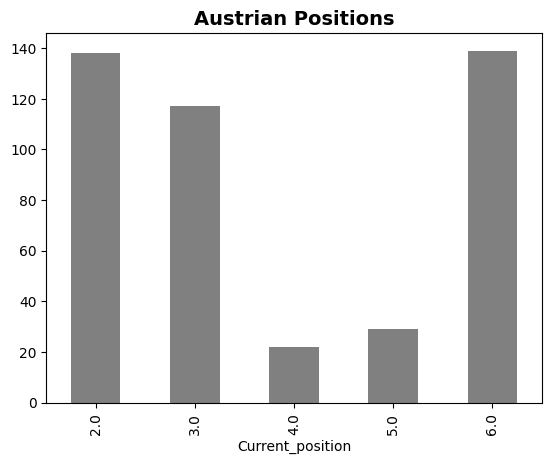

In [ ]:
# plt.figure(dpi=600)
data_at_formatted_academic['Current_position'].value_counts().sort_index().plot(kind='bar', color='gray')
plt.title('Austrian Positions', fontsize=14, fontweight='bold')
print(data_at_formatted_academic['Current_position'].value_counts().sort_index())

In [ ]:
## Creating dummy variables for the categorical variables Current Position, Contract Duration, and Leadership Position:

# data_at_formatted_academic_w_dummies = pd.get_dummies(data_at_formatted_academic, columns = ['Current_position'], drop_first=True) #'Contract_duration', 'Leadership_position'

data_at_formatted_academic = data_at_formatted_academic.dropna().reset_index(drop=True)

data_at_formatted_academic = data_at_formatted_academic.astype(float)

Current_position_col = ['Current_position']
Working_condition_cols = [col for col in data_at_formatted_academic.columns if col not in ['Job_satisfaction', 'Age', 'Burnout', 'Current_position']]

## Calculating the interaction terms for Age moderator:
for col in Working_condition_cols:
  data_at_formatted_academic[col+'_mod_Age'] = data_at_formatted_academic[col] * data_at_formatted_academic['Age']

data_at_formatted_academic.to_csv('data_at_formatted_academic.csv')

print(data_at_formatted_academic.columns.tolist())
print(np.shape(data_at_formatted_academic))

['Age', 'Current_position', 'Salary', 'Actual_hrs', 'Effort', 'Policy_influence', 'Teaching_percent', 'Research_percent', 'Academic_Resources', 'Perceived_Autonomy', 'Burnout', 'Job_satisfaction', 'Age_centered', 'Salary_mod_Age', 'Actual_hrs_mod_Age', 'Effort_mod_Age', 'Policy_influence_mod_Age', 'Teaching_percent_mod_Age', 'Research_percent_mod_Age', 'Academic_Resources_mod_Age', 'Perceived_Autonomy_mod_Age', 'Age_centered_mod_Age']
(445, 22)


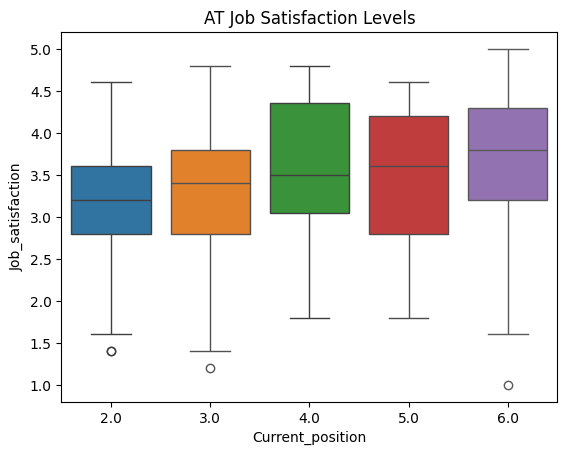

,Current Position,Job Satisfaction,Confidence Interval
0,2.0,3.196287,"[1.685, 4.600]"
1,3.0,3.235897,"[1.760, 4.400]"
2,4.0,3.554545,"[2.115, 4.800]"
3,5.0,3.533005,"[2.360, 4.600]"
4,6.0,3.704599,"[2.090, 5.000]"


In [ ]:
satisfaction = pd.DataFrame()
pos = []
satis = []
pbci = []

plt.figure()
for value in np.sort(data_at_formatted_academic['Current_position'].unique()):
  pos.append(value)
  data = data_at_formatted_academic[data_at_formatted_academic['Current_position']==value]
  satis.append(data['Job_satisfaction'].mean())
  lbound = np.percentile(data['Job_satisfaction'], 2.5)
  ubound = np.percentile(data['Job_satisfaction'], 97.5)
  pbci.append(f'[{lbound:.3f}, {ubound:.3f}]')
  sns.boxplot(x='Current_position', y = 'Job_satisfaction', data = data)
plt.title('AT Job Satisfaction Levels')
plt.show()



satisfaction['Current Position'] = pos
satisfaction['Job Satisfaction'] = satis
satisfaction['Confidence Interval'] = pbci
satisfaction

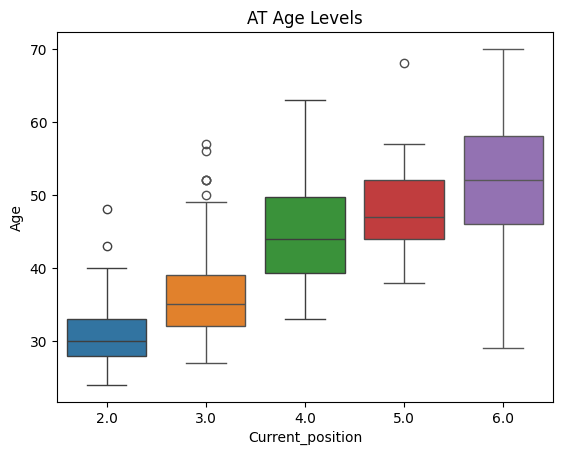

In [ ]:
plt.figure()
for value in np.sort(data_at_formatted_academic['Current_position'].unique()):
  data = data_at_formatted_academic[data_at_formatted_academic['Current_position']==value]
  sns.boxplot(x='Current_position', y = 'Age', data = data)
plt.title('AT Age Levels')
plt.show()

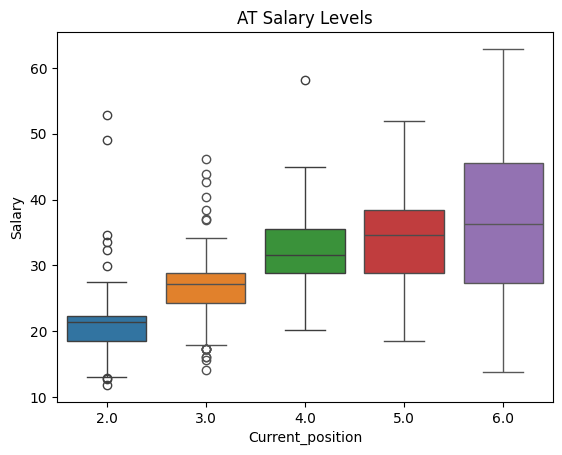

In [ ]:
plt.figure()
for value in np.sort(data_at_formatted_academic['Current_position'].unique()):
  data = data_at_formatted_academic[data_at_formatted_academic['Current_position']==value]
  sns.boxplot(x='Current_position', y = 'Salary', data = data)
plt.title('AT Salary Levels')
plt.show()

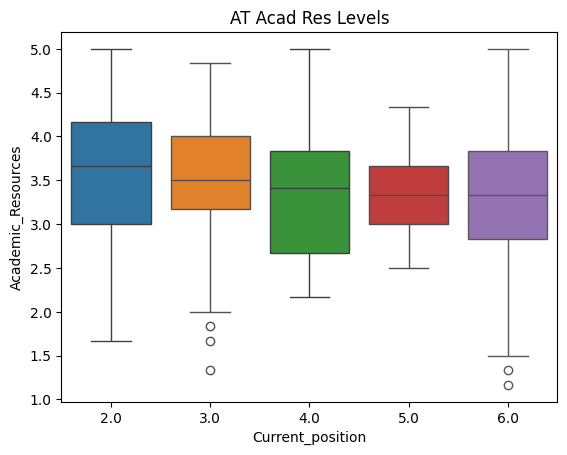

In [ ]:
plt.figure()
for value in np.sort(data_at_formatted_academic['Current_position'].unique()):
  data = data_at_formatted_academic[data_at_formatted_academic['Current_position']==value]
  sns.boxplot(x='Current_position', y = 'Academic_Resources', data = data)
plt.title('AT Acad Res Levels')
plt.show()

##Correlations and VIF Multicollinearity:

Text(0.5, 1.0, 'AT Correlation Heatmap')

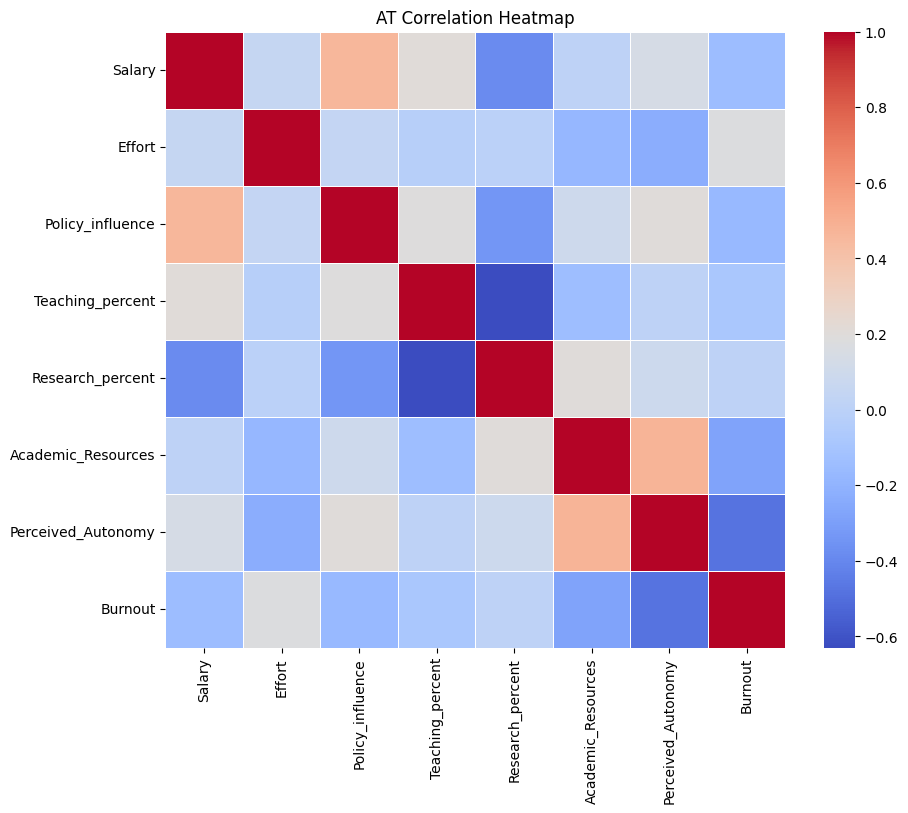

In [ ]:
corr_cols = [col for col in data_at_formatted_academic.columns if 'Age' not in col
             and 'Job_satisfaction' not in col and 'Actual_hrs' not in col
             and 'Current_position' not in col]
correlations = data_at_formatted_academic[corr_cols].corr()

plt.figure(figsize=(10, 8)) #, dpi=600)
sns.heatmap(correlations, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('AT Correlation Heatmap')

In [ ]:
## Performing Variance Inflation Factor (VIF) analysis of the dataset:

## Taking the moderation coefficients separately:
Moderation_cols = [col for col in data_at_formatted_academic.columns if 'mod_Age' in col] # and 'Job_satisfaction' not in col]
## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_at_formatted.columns if col not in ['Job_satisfaction','Age', 'Current_position']+Moderation_cols]

for cols in [Working_condition_cols, Moderation_cols]:
  if cols == Working_condition_cols:
    print('Working Conditions:')
  elif cols == Moderation_cols:
    print('Age-Moderated Working Conditions:')
  X = data_at_formatted_academic[cols].copy()
  X_const = add_constant(X)
  vif_data = pd.DataFrame()
  vif_data['Variable'] = X_const.columns
  vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

  print(vif_data)
  print('----------------------------------------')

Working Conditions:
             Variable         VIF
0               const  140.867627
1              Salary    1.513139
2          Actual_hrs    2.047905
3              Effort    1.858236
4    Policy_influence    1.417572
5    Teaching_percent    1.714912
6    Research_percent    2.054620
7  Academic_Resources    1.378400
8  Perceived_Autonomy    1.637169
9             Burnout    1.347055
----------------------------------------
Age-Moderated Working Conditions:
                     Variable        VIF
0                       const  66.017645
1              Salary_mod_Age   3.910927
2          Actual_hrs_mod_Age   7.034634
3              Effort_mod_Age   7.549532
4    Policy_influence_mod_Age   2.421098
5    Teaching_percent_mod_Age   2.275625
6    Research_percent_mod_Age   1.497027
7  Academic_Resources_mod_Age   3.226800
8  Perceived_Autonomy_mod_Age   2.843977
9        Age_centered_mod_Age   8.004255
----------------------------------------


In [ ]:
data_at_formatted_academic['Job_satisfaction'].unique()

array([3.4       , 3.8       , 4.6       , 2.        , 4.2       ,
       3.        , 2.2       , 3.6       , 2.4       , 4.        ,
       3.2       , 2.6       , 1.8       , 4.4       , 4.8       ,
       2.8       , 4.25714286, 1.        , 4.15      , 5.        ,
       1.4       , 1.2       , 3.28759124, 1.6       , 3.4540146 ,
       3.5459854 , 3.18928571])

## Calculating Cronbach's Alpha for the combined factors:

In [ ]:
def Cronbach_alpha_func(data, label):
  col_nr = data.shape[1]

  item_variances = np.var(data, axis=0, ddof=1)
  total_var = np.var(np.sum(data, axis=1), ddof=1)
  alpha_cronbach = (col_nr/(col_nr-1))*(1-(np.sum(item_variances)/total_var))

  print(f'{label} Cronbach Alpha:', alpha_cronbach)
  return alpha_cronbach

In [ ]:
## Academic Resources:

data_at_for_alpha_academic = data_at_job_w_inversion[(data_at_job_w_inversion['Current_position'].isin([2., 3., 4., 5., 6., 7., 8., 9.]))] # &
                                                    #  (data_at_job_w_inversion['Contract_duration']<6) &
                                                    #  (data_at_job_w_inversion['Leadership_position']<4)].dropna()
## Performing inversion:
# data_at_for_alpha_academic['Current_position'] = 11. - data_at_for_alpha_academic['Current_position']

print(len(data_at_for_alpha_academic))

academic_resources_for_alpha = np.asarray(data_at_for_alpha_academic[['Acad_res_facility', 'Acad_res_equip', 'Acad_res_lit',
                         'Acad_res_support', 'Acad_res_PD', 'Acad_res_funding']])

perceived_autonomy_for_alpha = np.asarray(data_at_for_alpha_academic[['Be_myself', "Follow_commands", 'Do_differently',
                                                             'Want_to_do', 'Done_best', 'Forced_to_do']])

burnout_for_alpha = np.asarray(data_at_for_alpha_academic[['Worn_out', 'Physically_exhausted',
                                                           'Emotionally_exhausted', 'Felt_tired']])

# leadership_quality_for_alpha = np.asarray(data_at_for_alpha_academic[['Development_opportunities', 'Prioritizes_satisfaction',
#                                                              'Work_planning', 'Solving_conflicts']])

# sense_of_community_for_alpha = np.asarray(data_at_for_alpha_academic[['Good_atmosphere', 'Good_cooperation', 'Part_of_community']])

job_satisfaction_for_alpha = np.asarray(data_at_for_alpha_academic[['Work_prospects', 'Physical_working_conditions',
                                                                      'Use_of_abilities', 'Satisfaction_w_salary',
                                                                      'Overall_satisfaction']].dropna())


acad_res_cron_alpha = Cronbach_alpha_func(academic_resources_for_alpha, 'Academic Resources')
perc_auton_cron_alpha = Cronbach_alpha_func(perceived_autonomy_for_alpha, 'Perceived Autonomy')
burnout_cron_alpha = Cronbach_alpha_func(burnout_for_alpha, 'Burnout')
# lead_qual_cron_alpha = Cronbach_alpha_func(leadership_quality_for_alpha, 'Leadership Quality')
# sens_comm_cron_alpha = Cronbach_alpha_func(sense_of_community_for_alpha, 'Sense of Community')
print('---------------------')
job_sat_cron_alpha = Cronbach_alpha_func(job_satisfaction_for_alpha, 'Job Satisfaction')





445
Academic Resources Cronbach Alpha: 0.7762949478533535
Perceived Autonomy Cronbach Alpha: 0.873410366616401
Burnout Cronbach Alpha: 0.8833357296509271
---------------------
Job Satisfaction Cronbach Alpha: 0.7597351383029666


## Structural Equation Modelling:

We study the relationship between academic position and job satisfaction, mediated by working conditions and moderated by age.

In [ ]:
## Taking the response variable (Job satisfaction), the moderator variable (Age), and the predictor variable(s) (Current Position):
Job_satisfaction_col = ['Job_satisfaction']
Age_col = ['Age']

## Taking the moderation coefficients separately:
Moderation_cols = [col for col in data_at_formatted_academic.columns if 'mod_Age' in col and 'Actual_hrs' not in col and
                   'Burnout' not in col and 'Age_centered' not in col]

## Taking the remaining variables for working conditions:
Working_condition_cols = [col for col in data_at_formatted_academic.columns if 'Actual_hrs' not in col and 'Burnout' not in col and
                          'Age' not in col and col not in Job_satisfaction_col+Age_col+['Current_position']+Moderation_cols]

Working_condition_cols

['Salary',
 'Effort',
 'Policy_influence',
 'Teaching_percent',
 'Research_percent',
 'Academic_Resources',
 'Perceived_Autonomy']

In [ ]:
Moderation_cols

['Salary_mod_Age',
 'Effort_mod_Age',
 'Policy_influence_mod_Age',
 'Teaching_percent_mod_Age',
 'Research_percent_mod_Age',
 'Academic_Resources_mod_Age',
 'Perceived_Autonomy_mod_Age']

In [ ]:
Working_condition_factors = " + ".join(Working_condition_cols)
Moderation_factors = " + ".join(Moderation_cols)


path_no_mod = f"""
Burnout ~ {Working_condition_factors}
Job_satisfaction ~ Burnout + {Working_condition_factors}
"""

path = f"""
Burnout ~ {Working_condition_factors} + {Moderation_factors}
Job_satisfaction ~ Burnout + {Working_condition_factors}
"""

# path = f"""
# Job_satisfaction ~ {Working_condition_factors} + {Moderation_factors}
# """




print('Mediation/Moderation Path Model Specification:')
print(path)
print('-----------------------------------')


Mediation/Moderation Path Model Specification:

Burnout ~ Salary + Effort + Policy_influence + Teaching_percent + Research_percent + Academic_Resources + Perceived_Autonomy + Salary_mod_Age + Effort_mod_Age + Policy_influence_mod_Age + Teaching_percent_mod_Age + Research_percent_mod_Age + Academic_Resources_mod_Age + Perceived_Autonomy_mod_Age
Job_satisfaction ~ Burnout + Salary + Effort + Policy_influence + Teaching_percent + Research_percent + Academic_Resources + Perceived_Autonomy

-----------------------------------


In [ ]:
multigroup_results = multigroup(
    desc=path,
    data=data_at_formatted_academic,
    group='Current_position'
)

In [ ]:
print("Multigroup Statistics:")
print(multigroup_results.stats)


print('-'*50)
print("\nParameter Estimates for Each Job Position:")

for curr_pos in np.sort(data_at_formatted_academic['Current_position'].unique()):
  estimates = multigroup_results.estimates[curr_pos]
  print(f"Job Position {curr_pos} Estimates:")
  print(estimates)
  print('*-'*25)
  # estimates.to_csv(f'AT_Multigroup_Coeff_Position_{curr_pos}.csv')

Multigroup Statistics:
{np.float64(3.0):        DoF  DoF Baseline      chi2  chi2 p-value  chi2 Baseline      CFI  \
Value  112           134  8.631998           1.0    3217.765975  1.03352   

            GFI     AGFI       NFI       TLI  RMSEA        AIC         BIC  \
Value  0.997317  0.99679  0.997317  1.040104      0  47.852444  114.144619   

         LogLik  
Value  0.073778  , np.float64(2.0):        DoF  DoF Baseline      chi2  chi2 p-value  chi2 Baseline       CFI  \
Value  112           134  5.750417           1.0    4038.096487  1.027215   

            GFI      AGFI       NFI       TLI  RMSEA        AIC         BIC  \
Value  0.998576  0.998296  0.998576  1.032561      0  47.916661  118.170749   

        LogLik  
Value  0.04167  , np.float64(6.0):        DoF  DoF Baseline       chi2  chi2 p-value  chi2 Baseline       CFI  \
Value  112           134  14.499048           1.0    3905.268827  1.025854   

            GFI      AGFI       NFI       TLI  RMSEA        AIC         

In [ ]:
position = 6.
data_for_analysis = data_at_formatted_academic[data_at_formatted_academic['Current_position']==position].reset_index(drop=True)

In [ ]:
model = semopy.Model(path)
result = model.fit(data_for_analysis)
print(result)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.104
Number of iterations: 39
Params: 0.030 0.011 -0.018 0.005 0.011 -0.624 -0.412 -0.000 -0.000 0.001 -0.000 -0.000 0.010 -0.001 -0.077 0.001 -0.001 0.038 -0.006 -0.005 0.355 0.438 0.536 0.235


In [ ]:
## Evaluating the model fit:
if 'Optimization terminated successfully' in result.message:
    print('Optimization Successful')
    print('EVALUATION:')
    fit_evaluation = semopy.calc_stats(model)
    print(fit_evaluation.T)
    print('-'*25)

Optimization Successful
EVALUATION:
                     Value
DoF             112.000000
DoF Baseline    134.000000
chi2             14.499048
chi2 p-value      1.000000
chi2 Baseline  3905.268827
CFI               1.025854
GFI               0.996287
AGFI              0.995558
NFI               0.996287
TLI               1.030932
RMSEA             0.000000
AIC              47.791381
BIC             118.218755
LogLik            0.104310
-------------------------


In [ ]:
ins = model.inspect()
print(ins)
# ins.to_csv('AT_Model_Parameter_Values.csv')

                lval  op                        rval  Estimate  Std. Err  \
0            Burnout   ~                      Salary  0.030321  0.037688   
1            Burnout   ~                      Effort  0.010565  0.014848   
2            Burnout   ~            Policy_influence -0.018266  0.419851   
3            Burnout   ~            Teaching_percent  0.005299  0.020996   
4            Burnout   ~            Research_percent  0.011001  0.037233   
5            Burnout   ~          Academic_Resources -0.624081  0.516608   
6            Burnout   ~          Perceived_Autonomy -0.412061  0.542089   
7            Burnout   ~              Salary_mod_Age -0.000403  0.000709   
8            Burnout   ~              Effort_mod_Age -0.000169  0.000274   
9            Burnout   ~    Policy_influence_mod_Age  0.000895  0.008077   
10           Burnout   ~    Teaching_percent_mod_Age -0.000142  0.000403   
11           Burnout   ~    Research_percent_mod_Age -0.000378  0.000689   
12          

In [ ]:
ins[ins['p-value']<0.05]

,lval,op,rval,Estimate,Std. Err,z-value,p-value
18,Job_satisfaction,~,Teaching_percent,-0.005724,0.002384,-2.400590,1.636865e-02
20,Job_satisfaction,~,Academic_Resources,0.354783,0.062595,5.667926,1.445361e-08
21,Job_satisfaction,~,Perceived_Autonomy,0.437911,0.058912,7.433279,1.059153e-13
22,Burnout,~~,Burnout,0.536085,0.064304,8.336666,0.000000e+00
23,Job_satisfaction,~~,Job_satisfaction,0.235140,0.028206,8.336666,0.000000e+00


In [ ]:
significance = []

for i in range(len(ins)):
  if ins['p-value'].iloc[i] <= 0.001:
    significance.append('***')
  elif 0.001 < ins['p-value'].iloc[i] <= 0.01:
    significance.append('**')
  elif 0.01 < ins['p-value'].iloc[i] <= 0.05:
    significance.append('*')
  else:
    significance.append(' (n.s.)')

ins['Significance'] = significance

ins['Estimate w Significance'] = round(ins['Estimate'],5).astype(str) + ins['Significance']
ins

,lval,op,rval,Estimate,Std. Err,z-value,p-value,Significance,Estimate w Significance
0,Burnout,~,Salary,0.030321,0.037688,0.804533,4.210893e-01,(n.s.),0.03032 (n.s.)
1,Burnout,~,Effort,0.010565,0.014848,0.711550,4.767433e-01,(n.s.),0.01057 (n.s.)
2,Burnout,~,Policy_influence,-0.018266,0.419851,-0.043505,9.652989e-01,(n.s.),-0.01827 (n.s.)
3,Burnout,~,Teaching_percent,0.005299,0.020996,0.252375,8.007514e-01,(n.s.),0.0053 (n.s.)
4,Burnout,~,Research_percent,0.011001,0.037233,0.295457,7.676449e-01,(n.s.),0.011 (n.s.)
5,Burnout,~,Academic_Resources,-0.624081,0.516608,-1.208036,2.270334e-01,(n.s.),-0.62408 (n.s.)
6,Burnout,~,Perceived_Autonomy,-0.412061,0.542089,-0.760135,4.471737e-01,(n.s.),-0.41206 (n.s.)
7,Burnout,~,Salary_mod_Age,-0.000403,0.000709,-0.568554,5.696591e-01,(n.s.),-0.0004 (n.s.)
8,Burnout,~,Effort_mod_Age,-0.000169,0.000274,-0.616194,5.377666e-01,(n.s.),-0.00017 (n.s.)
9,Burnout,~,Policy_influence_mod_Age,0.000895,0.008077,0.110859,9.117283e-01,(n.s.),0.0009 (n.s.)


In [ ]:
# ins.to_csv(f'AT_Model_Parameter_Values_position_{position}.csv')

## Performing Sobel Test for path effects:

In [ ]:
Sobel_z_stat_df  = pd.DataFrame(columns = ['Path']+Working_condition_cols)
Sobel_p_val_df  = pd.DataFrame(columns = ['Path']+ Working_condition_cols)

# for curr_pos in Current_position_dummy_cols:
Sobel_z = ['Mediation']
Sobel_p = ['Mediation']
Sobel_z_mod = ['Moderation']
Sobel_p_mod = ['Moderation']
Sobel_z_dir_path = ['Direct Path']
Sobel_p_dir_path = ['Direct Path']
for work_cond in Working_condition_cols:
  print(work_cond)
  WC_B_mean = float(ins['Estimate'][(ins['rval']==work_cond) & (ins['lval']=='Burnout')].iloc[0])
  WC_B_std = float(ins['Std. Err'][(ins['rval']==work_cond) & (ins['lval']=='Burnout')].iloc[0])
  B_JS_mean = float(ins['Estimate'][(ins['rval']=='Burnout') & (ins['lval']=='Job_satisfaction')].iloc[0])
  B_JS_std = float(ins['Std. Err'][(ins['rval']=='Burnout') & (ins['lval']=='Job_satisfaction')].iloc[0])
  ## Calculating Sobel Z-value statistic:
  z_value = (WC_B_mean*B_JS_mean)/np.sqrt(WC_B_mean**2 * B_JS_std**2 + B_JS_mean**2 * WC_B_std**2)

  WC_B_mean_mod = float(ins['Estimate'][(ins['rval']==work_cond+'_mod_Age') & (ins['lval']=='Burnout')].iloc[0])
  WC_B_std_mod = float(ins['Std. Err'][(ins['rval']==work_cond+'_mod_Age') & (ins['lval']=='Burnout')].iloc[0])
  z_value_mod = (WC_B_mean_mod*B_JS_mean)/np.sqrt(WC_B_mean_mod**2 * B_JS_std**2 + B_JS_mean**2 * WC_B_std_mod**2)

  # for curr_pos in Current_position_dummy_cols:
  #   WC_B_mean_mod = float(ins['Estimate'][(ins['rval']==work_cond+'_mod_'+curr_pos) & (ins['lval']=='Burnout')].iloc[0])
  #   WC_B_std_mod = float(ins['Std. Err'][(ins['rval']==work_cond+'_mod_'+curr_pos) & (ins['lval']=='Burnout')].iloc[0])
  #   z_value_mod = (WC_B_mean_mod*B_JS_mean)/np.sqrt(WC_B_mean_mod**2 * B_JS_std**2 + B_JS_mean**2 * WC_B_std_mod**2)

  WC_JS_Dir_path_mean = float(ins['Estimate'][(ins['rval']==work_cond) & (ins['lval']=='Job_satisfaction')].iloc[0])
  z_value_dir_path = float(ins['z-value'][(ins['rval']==work_cond) & (ins['lval']=='Job_satisfaction')].iloc[0])
  p_value_dir_path = float(ins['p-value'][(ins['rval']==work_cond) & (ins['lval']=='Job_satisfaction')].iloc[0])
  if p_value_dir_path <= 0.001:
    sig_dir_path = '***'
  elif p_value_dir_path <= 0.01:
    sig_dir_path = '**'
  elif p_value_dir_path <= 0.05:
    sig_dir_path = '*'
  else:
    sig_dir_path = ' (n.s.)'
  Sobel_z_dir_path.append(str(round(WC_JS_Dir_path_mean,4))+sig_dir_path)
  Sobel_p_dir_path.append(p_value_dir_path)



  ## Calculating two-tailed Sobel p-value:
  p_value_two_tailed = 2 * norm.sf(abs(z_value))

  if p_value_two_tailed<=0.001:
    sig = '***'
  elif p_value_two_tailed <= 0.01:
    sig = '**'
  elif p_value_two_tailed <= 0.05:
    sig = '*'
  else:
    sig = ' (n.s.)'
  Sobel_z.append(str(round(WC_B_mean*B_JS_mean,4))+sig)
  Sobel_p.append(p_value_two_tailed)

  p_value_two_tailed_mod = 2 * norm.sf(abs(z_value_mod))

  if p_value_two_tailed_mod<=0.001:
    sig_mod = '***'
  elif p_value_two_tailed_mod <= 0.01:
    sig_mod = '**'
  elif p_value_two_tailed_mod <= 0.05:
    sig_mod = '*'
  else:
    sig_mod = ' (n.s.)'
  Sobel_z_mod.append(str(round(WC_B_mean_mod*B_JS_mean,4))+sig_mod)
  Sobel_p_mod.append(p_value_two_tailed_mod)



Sobel_z_stat_df.loc[len(Sobel_z_stat_df)] = Sobel_z
Sobel_p_val_df.loc[len(Sobel_p_val_df)] = Sobel_p
Sobel_z_stat_df.loc[len(Sobel_z_stat_df)] = Sobel_z_mod
Sobel_p_val_df.loc[len(Sobel_p_val_df)] = Sobel_p_mod
Sobel_z_stat_df.loc[len(Sobel_z_stat_df)] = Sobel_z_dir_path
Sobel_p_val_df.loc[len(Sobel_p_val_df)] = Sobel_p_dir_path

Sobel_z_stat_df


Salary
Effort
Policy_influence
Teaching_percent
Research_percent
Academic_Resources
Perceived_Autonomy


,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Mediation,-0.0023 (n.s.),-0.0008 (n.s.),0.0014 (n.s.),-0.0004 (n.s.),-0.0008 (n.s.),0.048 (n.s.),0.0317 (n.s.)
1,Moderation,0.0 (n.s.),0.0 (n.s.),-0.0001 (n.s.),0.0 (n.s.),0.0 (n.s.),-0.0008 (n.s.),0.0001 (n.s.)
2,Direct Path,0.0006 (n.s.),-0.0011 (n.s.),0.0384 (n.s.),-0.0057*,-0.005 (n.s.),0.3548***,0.4379***


In [ ]:
Sobel_z_stat_df.set_index('Path').T

Path,Mediation,Moderation,Direct Path
Salary,-0.0023 (n.s.),0.0 (n.s.),0.0006 (n.s.)
Effort,-0.0008 (n.s.),0.0 (n.s.),-0.0011 (n.s.)
Policy_influence,0.0014 (n.s.),-0.0001 (n.s.),0.0384 (n.s.)
Teaching_percent,-0.0004 (n.s.),0.0 (n.s.),-0.0057*
Research_percent,-0.0008 (n.s.),0.0 (n.s.),-0.005 (n.s.)
Academic_Resources,0.048 (n.s.),-0.0008 (n.s.),0.3548***
Perceived_Autonomy,0.0317 (n.s.),0.0001 (n.s.),0.4379***


In [ ]:
Sobel_p_val_df.set_index('Path').T

Path,Mediation,Moderation,Direct Path
Salary,0.485879,0.598555,8.795506e-01
Effort,0.526202,0.573010,6.137444e-01
Policy_influence,0.965316,0.912005,3.344142e-01
Teaching_percent,0.803871,0.733188,1.636865e-02
Research_percent,0.772550,0.609955,1.707460e-01
Academic_Resources,0.361197,0.406884,1.445361e-08
Perceived_Autonomy,0.504500,0.897123,1.059153e-13


## Path Modelling with No Moderation:

In [ ]:
## Path Modelling with no age moderation:
model_no_mod = semopy.Model(path_no_mod)
result_no_mod = model_no_mod.fit(data_for_analysis)
print(result_no_mod)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.000
Number of iterations: 25
Params: 0.005 0.001 0.063 -0.001 -0.010 -0.129 -0.474 -0.077 0.001 -0.001 0.038 -0.006 -0.005 0.355 0.438 0.557 0.235


In [ ]:
if 'Optimization terminated successfully' in result_no_mod.message:
    print('Optimization Successful')
    print('EVALUATION:')
    fit_evaluation_no_mod = semopy.calc_stats(model_no_mod)
    print(fit_evaluation_no_mod.T)
    print('-'*25)

Optimization Successful
EVALUATION:
                      Value
DoF            2.800000e+01
DoF Baseline   4.300000e+01
chi2           8.941641e-06
chi2 p-value   1.000000e+00
chi2 Baseline  3.518651e+02
CFI            1.090654e+00
GFI            1.000000e+00
AGFI           1.000000e+00
NFI            1.000000e+00
TLI            1.139219e+00
RMSEA          0.000000e+00
AIC            3.400000e+01
BIC            8.388606e+01
LogLik         6.432835e-08
-------------------------


In [ ]:
ins_no_mod = model_no_mod.inspect()
print(ins_no_mod)
# ins_no_mod.to_csv(f'AT_No_Mod_Model_Parameter_Values_position_{position}.csv')

                lval  op                rval  Estimate  Std. Err   z-value  \
0            Burnout   ~              Salary  0.005198  0.005875  0.884690   
1            Burnout   ~              Effort  0.000538  0.003216  0.167198   
2            Burnout   ~    Policy_influence  0.062839  0.061048  1.029337   
3            Burnout   ~    Teaching_percent -0.001452  0.003667 -0.395927   
4            Burnout   ~    Research_percent -0.010293  0.005577 -1.845560   
5            Burnout   ~  Academic_Resources -0.129267  0.095689 -1.350913   
6            Burnout   ~  Perceived_Autonomy -0.474392  0.081230 -5.840129   
7   Job_satisfaction   ~             Burnout -0.076892  0.055130 -1.394752   
8   Job_satisfaction   ~              Salary  0.000582  0.003830  0.152056   
9   Job_satisfaction   ~              Effort -0.001055  0.002091 -0.504798   
10  Job_satisfaction   ~    Policy_influence  0.038499  0.039830  0.966590   
11  Job_satisfaction   ~    Teaching_percent -0.005723  0.002385

## Sobel Test for Path Effects (No Moderation)

In [ ]:
Sobel_z_stat_no_mod  = pd.DataFrame(columns = ['Path']+Working_condition_cols)
Sobel_p_val_no_mod  = pd.DataFrame(columns = ['Path']+ Working_condition_cols)

# for curr_pos in Current_position_dummy_cols:
Sobel_z = ['Mediation']
Sobel_p = ['Mediation']
Sobel_z_dir_path = ['Direct Path']
Sobel_p_dir_path = ['Direct Path']
for work_cond in Working_condition_cols:
  WC_B_mean = float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Burnout')].iloc[0])
  WC_B_std = float(ins_no_mod['Std. Err'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Burnout')].iloc[0])
  B_JS_mean = float(ins_no_mod['Estimate'][(ins_no_mod['rval']=='Burnout') & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0])
  B_JS_std = float(ins_no_mod['Std. Err'][(ins_no_mod['rval']=='Burnout') & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0])
  ## Calculating Sobel Z-value statistic:
  z_value = (WC_B_mean*B_JS_mean)/np.sqrt(WC_B_mean**2 * B_JS_std**2 + B_JS_mean**2 * WC_B_std**2)

  WC_JS_Dir_path_mean = float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0])
  z_value_dir_path = float(ins_no_mod['z-value'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0])
  p_value_dir_path = float(ins_no_mod['p-value'][(ins_no_mod['rval']==work_cond) & (ins_no_mod['lval']=='Job_satisfaction')].iloc[0])
  if p_value_dir_path <= 0.001:
    sig_dir_path = '***'
  elif p_value_dir_path <= 0.01:
    sig_dir_path = '**'
  elif p_value_dir_path <= 0.05:
    sig_dir_path = '*'
  else:
    sig_dir_path = ' (n.s.)'
  Sobel_z_dir_path.append(str(round(WC_JS_Dir_path_mean,4))+sig_dir_path)
  Sobel_p_dir_path.append(p_value_dir_path)



  ## Calculating two-tailed Sobel p-value:
  p_value_two_tailed = 2 * norm.sf(abs(z_value))

  if p_value_two_tailed<=0.001:
    sig = '***'
  elif p_value_two_tailed <= 0.01:
    sig = '**'
  elif p_value_two_tailed <= 0.05:
    sig = '*'
  else:
    sig = ' (n.s.)'
  Sobel_z.append(str(round(WC_B_mean*B_JS_mean,4))+sig)
  Sobel_p.append(p_value_two_tailed)



Sobel_z_stat_no_mod.loc[len(Sobel_z_stat_no_mod)] = Sobel_z
Sobel_p_val_no_mod.loc[len(Sobel_p_val_no_mod)] = Sobel_p
Sobel_z_stat_no_mod.loc[len(Sobel_z_stat_no_mod)] = Sobel_z_dir_path
Sobel_p_val_no_mod.loc[len(Sobel_p_val_no_mod)] = Sobel_p_dir_path

Sobel_z_stat_no_mod

,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Mediation,-0.0004 (n.s.),-0.0 (n.s.),-0.0048 (n.s.),0.0001 (n.s.),0.0008 (n.s.),0.0099 (n.s.),0.0365 (n.s.)
1,Direct Path,0.0006 (n.s.),-0.0011 (n.s.),0.0385 (n.s.),-0.0057*,-0.005 (n.s.),0.3548***,0.4379***


In [ ]:
Sobel_z_stat_no_mod.set_index('Path').T

Path,Mediation,Direct Path
Salary,-0.0004 (n.s.),0.0006 (n.s.)
Effort,-0.0 (n.s.),-0.0011 (n.s.)
Policy_influence,-0.0048 (n.s.),0.0385 (n.s.)
Teaching_percent,0.0001 (n.s.),-0.0057*
Research_percent,0.0008 (n.s.),-0.005 (n.s.)
Academic_Resources,0.0099 (n.s.),0.3548***
Perceived_Autonomy,0.0365 (n.s.),0.4379***


In [ ]:
Sobel_p_val_no_mod.set_index('Path').T

Path,Mediation,Direct Path
Salary,0.455017,8.791426e-01
Effort,0.868149,6.137010e-01
Policy_influence,0.407550,3.337493e-01
Teaching_percent,0.703294,1.640355e-02
Research_percent,0.265824,1.710134e-01
Academic_Resources,0.331863,1.447472e-08
Perceived_Autonomy,0.174908,1.063594e-13


## Bootstrapping:

In [ ]:
times = 2000

Evaluation_cols = ['DoF', 'DoF Baseline', 'chi2', 'chi2 p-value', 'chi2 Baseline', 'CFI',
                   'GFI', 'AGFI', 'NFI', 'TLI', 'RMSEA', 'AIC', 'BIC', 'LogLik']


bootstrap_path_values = pd.DataFrame(columns = ['Bootstrap_nr', 'Path']+Working_condition_cols+Evaluation_cols)
bootstrap_path_values_no_mod = pd.DataFrame(columns = ['Bootstrap_nr', 'Path']+Working_condition_cols+Evaluation_cols)
# moderation_path_values = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols)
# mediation_path_values_no_mod = pd.DataFrame(columns = ['Bootstrap_nr', 'Current_position']+Working_condition_cols+['Job_satisfaction']+Evaluation_cols)

model = semopy.Model(path)
model_no_mod = semopy.Model(path_no_mod)

for i in range(times):
  if i % 20 ==0:
    print(f'Run: {i}/{times}')
  data_at_bootstrapped = data_for_analysis.sample(n=len(data_for_analysis), replace=True, random_state=i).reset_index(drop=True)

  # model = semopy.Model(path)
  result = model.fit(data_at_bootstrapped)
  ins = model.inspect()
  # model_no_mod = semopy.Model(path_no_mod)
  result_no_mod = model_no_mod.fit(data_at_bootstrapped)
  ins_no_mod = model_no_mod.inspect()

  if 'Optimization terminated successfully' in result.message and 'Optimization terminated successfully' in result_no_mod.message:
    # print('Optimization Successful')

    ## ---------------- Returning the full indirect path fits for the path model with Age moderation: ----------------------
    fit_evaluation = semopy.calc_stats(model)
    # print('EVALUATION (Chi2 p-value):', float(fit_evaluation['chi2 p-value'].iloc[0]))

    # for curr_pos in Current_position_dummy_cols:
    med_coeff = [i, 'Mediation']
    mod_coeff = [i, 'Moderation']
    dir_path_coeff = [i, 'Direct Path']
    for work_cond in Working_condition_cols:
      med_coeff.append(float(ins['Estimate'][(ins['rval']==work_cond) &
                        (ins['lval']=='Burnout')].iloc[0]) * float(ins['Estimate'][(ins['rval']=='Burnout') &
                        (ins['lval']=='Job_satisfaction')].iloc[0]))
      mod_coeff.append(float(ins['Estimate'][(ins['rval']==work_cond+'_mod_Age') &
                        (ins['lval']=='Burnout')].iloc[0]) * float(ins['Estimate'][(ins['rval']=='Burnout') &
                        (ins['lval']=='Job_satisfaction')].iloc[0]))
      dir_path_coeff.append(float(ins['Estimate'][(ins['rval']==work_cond) &
                        (ins['lval']=='Job_satisfaction')].iloc[0]))
    med_coeff = med_coeff + fit_evaluation.iloc[0].tolist()
    mod_coeff = mod_coeff + fit_evaluation.iloc[0].tolist()
    dir_path_coeff = dir_path_coeff + fit_evaluation.iloc[0].tolist()
    bootstrap_path_values.loc[len(bootstrap_path_values)] = med_coeff
    bootstrap_path_values.loc[len(bootstrap_path_values)] = mod_coeff
    bootstrap_path_values.loc[len(bootstrap_path_values)] = dir_path_coeff


    ## ---------------- Returning the full indirect path fits for the path model without Age moderation: ----------------------
    fit_evaluation_no_mod = semopy.calc_stats(model_no_mod)
    # print('EVALUATION NO MOD (Chi2 p-value):', float(fit_evaluation_no_mod['chi2 p-value'].iloc[0]))

    # for curr_pos in Current_position_dummy_cols:
    med_coeff_no_mod = [i, 'Mediation']
    dir_path_coeff_no_mod = [i, 'Direct Path']
    for work_cond in Working_condition_cols:
      med_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) &
                        (ins_no_mod['lval']=='Burnout')].iloc[0]) * float(ins_no_mod['Estimate'][(ins_no_mod['rval']=='Burnout') &
                        (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
      dir_path_coeff_no_mod.append(float(ins_no_mod['Estimate'][(ins_no_mod['rval']==work_cond) &
                        (ins_no_mod['lval']=='Job_satisfaction')].iloc[0]))
    med_coeff_no_mod = med_coeff_no_mod + fit_evaluation_no_mod.iloc[0].tolist()
    dir_path_coeff_no_mod = dir_path_coeff_no_mod + fit_evaluation_no_mod.iloc[0].tolist()
    bootstrap_path_values_no_mod.loc[len(bootstrap_path_values_no_mod)] = med_coeff_no_mod
    bootstrap_path_values_no_mod.loc[len(bootstrap_path_values_no_mod)] = dir_path_coeff_no_mod

  else:
    print('Run:', i)
    print('Optimization Unsuccessful')

bootstrap_path_values

Run: 0/2000
Run: 20/2000
Run: 40/2000
Run: 60/2000
Run: 80/2000
Run: 100/2000
Run: 120/2000
Run: 140/2000
Run: 160/2000
Run: 180/2000
Run: 200/2000
Run: 220/2000
Run: 240/2000
Run: 260/2000
Run: 280/2000
Run: 300/2000
Run: 320/2000
Run: 340/2000
Run: 360/2000
Run: 380/2000
Run: 400/2000
Run: 420/2000
Run: 440/2000
Run: 460/2000
Run: 480/2000
Run: 500/2000
Run: 520/2000
Run: 540/2000
Run: 560/2000
Run: 580/2000
Run: 600/2000
Run: 620/2000
Run: 640/2000
Run: 660/2000
Run: 680/2000
Run: 700/2000
Run: 720/2000
Run: 740/2000
Run: 760/2000
Run: 780/2000
Run: 800/2000
Run: 820/2000
Run: 840/2000
Run: 860/2000
Run: 880/2000
Run: 900/2000
Run: 920/2000
Run: 940/2000
Run: 960/2000
Run: 980/2000
Run: 1000/2000
Run: 1020/2000
Run: 1040/2000
Run: 1060/2000
Run: 1080/2000
Run: 1100/2000
Run: 1120/2000
Run: 1140/2000
Run: 1160/2000
Run: 1180/2000
Run: 1200/2000
Run: 1220/2000
Run: 1240/2000
Run: 1260/2000
Run: 1280/2000
Run: 1300/2000
Run: 1320/2000
Run: 1340/2000
Run: 1360/2000
Run: 1380/2000
Run: 1

,Bootstrap_nr,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,DoF,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Mediation,-0.001484,-0.000422,-0.027224,-0.002101,0.000458,0.042411,0.041779,112.0,...,3913.487121,1.028768,0.999164,0.998999,0.999164,1.034418,0.000000,47.952906,118.380280,0.023547
1,0,Moderation,0.000008,0.000008,0.000530,0.000045,-0.000003,-0.000806,-0.000294,112.0,...,3913.487121,1.028768,0.999164,0.998999,0.999164,1.034418,0.000000,47.952906,118.380280,0.023547
2,0,Direct Path,-0.001339,0.000793,0.006803,-0.011048,-0.007739,0.416358,0.384135,112.0,...,3913.487121,1.028768,0.999164,0.998999,0.999164,1.034418,0.000000,47.952906,118.380280,0.023547
3,1,Mediation,-0.008127,-0.000020,-0.022345,-0.000631,-0.002372,0.041621,0.040583,112.0,...,4181.906442,0.894472,0.871072,0.845747,0.871072,0.873744,0.166245,40.242222,110.669597,3.878889
4,1,Moderation,0.000127,-0.000018,0.000381,0.000013,0.000072,-0.000563,-0.000121,112.0,...,4181.906442,0.894472,0.871072,0.845747,0.871072,0.873744,0.166245,40.242222,110.669597,3.878889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1998,Moderation,0.000019,0.000011,-0.000352,0.000025,0.000032,-0.000496,-0.000029,112.0,...,4150.719725,0.945926,0.920689,0.905110,0.920689,0.935305,0.118544,43.263327,113.690702,2.368336
5996,1998,Direct Path,-0.000584,0.000266,0.039819,-0.005649,-0.003900,0.303121,0.482845,112.0,...,4150.719725,0.945926,0.920689,0.905110,0.920689,0.935305,0.118544,43.263327,113.690702,2.368336
5997,1999,Mediation,0.002843,-0.002239,0.014081,-0.001216,0.007927,-0.004789,0.052362,112.0,...,4137.299638,0.958521,0.932793,0.919592,0.932793,0.950373,0.103652,43.999227,114.426601,2.000387
5998,1999,Moderation,-0.000078,0.000036,-0.000293,0.000025,-0.000136,0.000241,-0.000078,112.0,...,4137.299638,0.958521,0.932793,0.919592,0.932793,0.950373,0.103652,43.999227,114.426601,2.000387


In [ ]:
bootstrap_path_values.to_csv(f'AT_bootstrap_path_values_position_{position}.csv')
bootstrap_path_values_no_mod.to_csv(f'AT_bootstrap_path_values_no_mod_position_{position}.csv')

## Bootstrap Results Analysis:

In [ ]:
# path_to_bootstrap = 'https://raw.githubusercontent.com/AndreiAf02/Job-Satisfaction/refs/heads/main/AT_bootstrap/'

# mediation_path_values = pd.read_csv(path_to_bootstrap+'AT_mediation_path_values.csv', sep=",", header=0).iloc[:,1:]
# moderation_path_values = pd.read_csv(path_to_bootstrap+'AT_moderation_path_values.csv', sep=",", header=0).iloc[:,1:]
# mediation_path_values_no_mod = pd.read_csv(path_to_bootstrap+'AT_mediation_path_values_no_mod.csv', sep=",", header=0).iloc[:,1:]

In [ ]:
bootstrap_path_values

,Bootstrap_nr,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy,DoF,...,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
0,0,Mediation,0.168217,0.029447,-1.185437,-0.039402,-0.218844,-1.968655,2.551486,112.0,...,1206.640146,1.083026,0.980986,0.977251,0.980986,1.099335,0.000000,46.417739,79.232839,0.791131
1,0,Moderation,-0.003599,-0.000553,0.024120,0.001674,0.004487,0.042322,-0.055380,112.0,...,1206.640146,1.083026,0.980986,0.977251,0.980986,1.099335,0.000000,46.417739,79.232839,0.791131
2,0,Direct Path,0.025306,-0.013398,0.274235,-0.016522,0.016291,0.365621,0.398681,112.0,...,1206.640146,1.083026,0.980986,0.977251,0.980986,1.099335,0.000000,46.417739,79.232839,0.791131
3,1,Mediation,0.175347,0.005909,-0.104861,-0.173135,-0.017696,-1.228027,1.140689,112.0,...,1231.508907,0.472455,0.438912,0.328698,0.438912,0.368830,0.429681,0.345856,33.160956,23.827072
4,1,Moderation,-0.003689,-0.000235,0.004319,0.003860,0.000138,0.024414,-0.025617,112.0,...,1231.508907,0.472455,0.438912,0.328698,0.438912,0.368830,0.429681,0.345856,33.160956,23.827072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1998,Moderation,0.003708,0.004143,0.135326,-0.003419,0.006102,-0.156094,-0.110374,112.0,...,1245.688917,0.410616,0.384107,0.263127,0.384107,0.294844,0.457091,-4.911149,27.903951,26.455574
5996,1998,Direct Path,0.003812,-0.013433,0.197624,-0.027455,0.023049,0.189221,0.358820,112.0,...,1245.688917,0.410616,0.384107,0.263127,0.384107,0.294844,0.457091,-4.911149,27.903951,26.455574
5997,1999,Mediation,-0.166607,-0.160023,-5.803217,0.172770,-0.210431,6.017059,4.624330,112.0,...,1487.377235,0.358756,0.341226,0.211824,0.341226,0.232797,0.526058,-19.575563,13.239537,33.787781
5998,1999,Moderation,0.002364,0.003754,0.121583,-0.003193,0.005414,-0.140542,-0.096156,112.0,...,1487.377235,0.358756,0.341226,0.211824,0.341226,0.232797,0.526058,-19.575563,13.239537,33.787781


##Analyzing the bootstrap results:

In [ ]:
mean_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)
lbound_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)
ubound_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)
pbci_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)
pbci_90_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)

for path in bootstrap_path_values['Path'].unique().tolist():
  data = bootstrap_path_values[bootstrap_path_values['Path']==path].reset_index(drop=True)
  mean_vals = [path]
  lbound_vals = [path]
  ubound_vals = [path]
  pbci_vals = [path]
  pbci_90_vals = [path]

  for col in Working_condition_cols:
    mean_vals.append(data[col].mean())
    ## Calculating the lower and upper bounds of the Percentile Bootstrap Confidence Interval (PBCI):
    lbound = np.percentile(data[col], 2.5)
    ubound = np.percentile(data[col], 97.5)
    if lbound > 0. or ubound < 0.:
      sig = ' *'
    else:
      sig = ''
    lbound_vals.append(lbound)
    ubound_vals.append(ubound)
    pbci_vals.append('['+str(round(lbound,4))+', '+str(round(ubound,4))+']'+sig)
    pbci_90_vals.append('['+str(round(np.percentile(data[col], 5.),4))+', '+str(round(np.percentile(data[col], 95),4))+']')

  mean_results.loc[len(mean_results)] = mean_vals
  lbound_results.loc[len(lbound_results)] = lbound_vals
  ubound_results.loc[len(ubound_results)] = ubound_vals
  pbci_results.loc[len(pbci_results)] = pbci_vals
  pbci_90_results.loc[len(pbci_90_results)] = pbci_90_vals



mean_results

,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Mediation,-0.131442,-0.128890,-4.470333,0.141588,-0.166392,4.860926,3.854572
1,Moderation,0.002510,0.002894,0.089723,-0.002656,0.003574,-0.103967,-0.080220
2,Direct Path,0.009630,-0.014562,0.182873,-0.008575,0.017620,0.633148,0.182415


In [ ]:
lbound_results

,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Mediation,-3.204176e-01,-0.299144,-9.715278,0.000252,-0.371970,0.001476,0.015802
1,Moderation,3.895107e-07,-0.000180,0.000423,-0.007693,0.000014,-0.224985,-0.176660
2,Direct Path,-2.387129e-02,-0.029461,-0.145187,-0.035923,-0.004330,0.166054,-0.287693


In [ ]:
ubound_results

,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Mediation,-0.000030,0.010966,-0.022342,0.387652,-0.000654,10.622243,8.422472
1,Moderation,0.006370,0.006578,0.198714,0.000185,0.008153,-0.000028,-0.000350
2,Direct Path,0.044972,-0.002437,0.493705,0.016801,0.045762,1.155806,0.583320


In [ ]:
pbci_results.set_index('Path').T

Path,Mediation,Moderation,Direct Path
Salary,"[-0.3204, -0.0] *","[0.0, 0.0064] *","[-0.0239, 0.045]"
Effort,"[-0.2991, 0.011]","[-0.0002, 0.0066]","[-0.0295, -0.0024] *"
Policy_influence,"[-9.7153, -0.0223] *","[0.0004, 0.1987] *","[-0.1452, 0.4937]"
Teaching_percent,"[0.0003, 0.3877] *","[-0.0077, 0.0002]","[-0.0359, 0.0168]"
Research_percent,"[-0.372, -0.0007] *","[0.0, 0.0082] *","[-0.0043, 0.0458]"
Academic_Resources,"[0.0015, 10.6222] *","[-0.225, -0.0] *","[0.1661, 1.1558] *"
Perceived_Autonomy,"[0.0158, 8.4225] *","[-0.1767, -0.0004] *","[-0.2877, 0.5833]"


In [ ]:
pbci_90_results.set_index('Path').T

Path,Mediation,Moderation,Direct Path
Salary,"[-0.2734, -0.0243]","[0.0004, 0.0054]","[-0.0184, 0.0385]"
Effort,"[-0.267, -0.0122]","[0.0003, 0.0058]","[-0.0271, -0.0047]"
Policy_influence,"[-8.659, -0.9255]","[0.0176, 0.1757]","[-0.0963, 0.4476]"
Teaching_percent,"[0.0171, 0.3147]","[-0.0063, -0.0002]","[-0.0309, 0.0119]"
Research_percent,"[-0.332, -0.0326]","[0.0007, 0.0073]","[-0.0012, 0.0417]"
Academic_Resources,"[0.9801, 9.5355]","[-0.2019, -0.0195]","[0.2354, 1.0844]"
Perceived_Autonomy,"[0.7967, 7.5902]","[-0.1622, -0.0166]","[-0.216, 0.5264]"


In [ ]:
mean_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)
lbound_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)
ubound_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)
pbci_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)
pbci_90_results = pd.DataFrame(columns = ['Path']+Working_condition_cols)

for path in bootstrap_path_values_no_mod['Path'].unique().tolist():
  data = bootstrap_path_values_no_mod[bootstrap_path_values_no_mod['Path']==path].reset_index(drop=True)
  mean_vals = [path]
  lbound_vals = [path]
  ubound_vals = [path]
  pbci_vals = [path]
  pbci_90_vals = [path]

  for col in Working_condition_cols:
    mean_vals.append(data[col].mean())
    ## Calculating the lower and upper bounds of the Percentile Bootstrap Confidence Interval (PBCI):
    lbound = np.percentile(data[col], 2.5)
    ubound = np.percentile(data[col], 97.5)
    if lbound > 0. or ubound < 0.:
      sig = ' *'
    else:
      sig = ''
    lbound_vals.append(lbound)
    ubound_vals.append(ubound)
    pbci_vals.append('['+str(round(lbound,4))+', '+str(round(ubound,4))+']'+sig)
    pbci_90_vals.append('['+str(round(np.percentile(data[col], 5.),4))+', '+str(round(np.percentile(data[col], 95),4))+']')

  mean_results.loc[len(mean_results)] = mean_vals
  lbound_results.loc[len(lbound_results)] = lbound_vals
  ubound_results.loc[len(ubound_results)] = ubound_vals
  pbci_results.loc[len(pbci_results)] = pbci_vals
  pbci_90_results.loc[len(pbci_90_results)] = pbci_90_vals



mean_results

,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Mediation,0.000711,0.001570,-0.051029,0.008769,-0.007385,0.065916,-0.091524
1,Direct Path,0.009627,-0.014582,0.183109,-0.008589,0.017622,0.633177,0.182114


In [ ]:
lbound_results

,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Mediation,-0.013377,-0.005516,-0.220979,-0.002134,-0.022789,-0.162853,-0.334521
1,Direct Path,-0.024016,-0.029654,-0.145192,-0.035920,-0.004331,0.165524,-0.290116


In [ ]:
ubound_results

,Path,Salary,Effort,Policy_influence,Teaching_percent,Research_percent,Academic_Resources,Perceived_Autonomy
0,Mediation,0.015948,0.013143,0.051752,0.025280,0.004091,0.345267,0.115492
1,Direct Path,0.044971,-0.002438,0.498385,0.016985,0.045763,1.156777,0.583784


In [ ]:
pbci_results.set_index('Path').T

Path,Mediation,Direct Path
Salary,"[-0.0134, 0.0159]","[-0.024, 0.045]"
Effort,"[-0.0055, 0.0131]","[-0.0297, -0.0024] *"
Policy_influence,"[-0.221, 0.0518]","[-0.1452, 0.4984]"
Teaching_percent,"[-0.0021, 0.0253]","[-0.0359, 0.017]"
Research_percent,"[-0.0228, 0.0041]","[-0.0043, 0.0458]"
Academic_Resources,"[-0.1629, 0.3453]","[0.1655, 1.1568] *"
Perceived_Autonomy,"[-0.3345, 0.1155]","[-0.2901, 0.5838]"


In [ ]:
pbci_90_results.set_index('Path').T

Path,Mediation,Direct Path
Salary,"[-0.0098, 0.012]","[-0.0184, 0.0384]"
Effort,"[-0.0041, 0.0099]","[-0.0272, -0.0047]"
Policy_influence,"[-0.175, 0.0316]","[-0.0964, 0.4476]"
Teaching_percent,"[-0.0003, 0.0217]","[-0.031, 0.0121]"
Research_percent,"[-0.0194, 0.0012]","[-0.0012, 0.0417]"
Academic_Resources,"[-0.1046, 0.2815]","[0.2341, 1.0852]"
Perceived_Autonomy,"[-0.2902, 0.0405]","[-0.2181, 0.5264]"


## MCMC:

In [ ]:
data_for_analysis['Current_position'].unique()

array([6.])

In [ ]:

## Defining the working condition columns:
Salary = data_for_analysis['Salary']
Effort = data_for_analysis['Effort']
Teaching_percent = data_for_analysis['Teaching_percent']
Research_percent = data_for_analysis['Research_percent']
Policy_influence = data_for_analysis['Policy_influence']
Academic_Resources = data_for_analysis['Academic_Resources']
Perceived_Autonomy = data_for_analysis['Perceived_Autonomy']
## Defining the Age and Gender columns:
Age = data_for_analysis['Age']
## Defining the Burnout column:
Burnout = data_for_analysis['Burnout']
## Defining the Job Satisfaction column:
Job_satisfaction = data_for_analysis['Job_satisfaction']

In [ ]:
# ## Model based on the mediation model outlined here: https://www.pymc.io/projects/examples/en/stable/case_studies/mediation_analysis.html

def mediation_model(Salary, Effort, Teaching_percent, Research_percent,
                    Policy_influence, Academic_Resources,
                    Perceived_Autonomy, Age, Burnout, Job_satisfaction):
    with pm.Model() as model:
        ## Setting up the Job Satisfaction response variable:
        Job_satisfaction = pm.Data("Job_satisfaction", Job_satisfaction, dims="obs_id")
        ## Setting up the mediation coefficients (Working Conditions):
        Salary = pm.Data("Salary", Salary, dims="obs_id")
        Effort = pm.Data("Effort", Effort, dims="obs_id")
        Teaching_percent = pm.Data("Teaching_percent", Teaching_percent, dims="obs_id")
        Research_percent = pm.Data("Research_percent", Research_percent, dims="obs_id")
        Policy_influence = pm.Data("Policy_influence", Policy_influence, dims="obs_id")
        Academic_Resources = pm.Data("Academic_Resources", Academic_Resources, dims="obs_id")
        Perceived_Autonomy = pm.Data("Perceived_Autonomy", Perceived_Autonomy, dims="obs_id")

        ## Setting up the Moderator (Age):
        Age = pm.Data('Age', Age, dims="obs_id")

        ## Setting up the Burnout mediator:
        Burnout = pm.Data('Burnout', Burnout, dims="obs_id")

        # intercept priors
        iy = pm.Normal("iy", mu=0, sigma=10) ## for Job satisfaction
        im1 = pm.Normal("im1", mu=0, sigma=10) ## for Burnout

        # Working condition mediation priors:
        a1 = pm.Normal("a1", mu=0, sigma=1) ## for Salary ~ Burnout
        a2 = pm.Normal("a2", mu=0, sigma=1) ## for Effort ~ Burnout
        a3 = pm.Normal("a3", mu=0, sigma=1) ## for Teaching % ~ Burnout
        a4 = pm.Normal("a4", mu=0, sigma=1) ## for Research % ~ Burnout
        a5 = pm.Normal("a5", mu=0, sigma=1) ## for Policy Influence ~ Burnout
        a6 = pm.Normal("a6", mu=0, sigma=1) ## for Academic Resources ~ Burnout
        a7 = pm.Normal("a7", mu=0, sigma=1) ## for Perceived Autonomy ~ Burnout

        ## Direct Pathway priors:
        med1 = pm.Normal("med1", mu=0, sigma=1) ## for Job Satisfaction ~ Burnout
        dp1 = pm.Normal("dp1", mu=0, sigma=1) ## for Job Satisfaction ~ Salary
        dp2 = pm.Normal("dp2", mu=0, sigma=1) ## for Job Satisfaction ~ Effort
        dp3 = pm.Normal("dp3", mu=0, sigma=1) ## for Job Satisfaction ~ Teaching %
        dp4 = pm.Normal("dp4", mu=0, sigma=1) ## for Job Satisfaction ~ Research %
        dp5 = pm.Normal("dp5", mu=0, sigma=1) ## for Job Satisfaction ~ Policy Influence
        dp6 = pm.Normal("dp6", mu=0, sigma=1) ## for Job Satisfaction ~ Academic Resources
        dp7 = pm.Normal("dp7", mu=0, sigma=1) ## for Job Satisfaction ~ Perceived Autonomy

        ## Moderation coefficient priors:
        mod1 = pm.Normal("mod1", mu=0, sigma=1) ## for Age-Moderation on Salary
        mod2 = pm.Normal("mod2", mu=0, sigma=1) ## for Age-Moderation on Effort
        mod3 = pm.Normal("mod3", mu=0, sigma=1) ## for Age-Moderation on Teaching %
        mod4 = pm.Normal("mod4", mu=0, sigma=1) ## for Age-Moderation on Research %
        mod5 = pm.Normal("mod5", mu=0, sigma=1) ## for Age-Moderation on Policy Influence
        mod6 = pm.Normal("mod6", mu=0, sigma=1) ## for Age-Moderation on Academic Resources
        mod7 = pm.Normal("mod7", mu=0, sigma=1) ## for Age-Moderation on Perceived Autonomy

        ## noise priors
        σm1 = pm.HalfCauchy("σm1", 1) ## Noise for mediation for Burnout
        σy = pm.HalfCauchy("σy", 1) ## Noise for full model

        ## likelihood
        pm.Normal("Burnout_likelihood", mu=im1 + a1*Salary + a2*Effort + a3*Teaching_percent + a4*Research_percent +
                  a5*Policy_influence + a6*Academic_Resources + a7*Perceived_Autonomy +
                  mod1*Salary*Age + mod2*Effort*Age + mod3*Teaching_percent*Age + mod4*Research_percent*Age +
                  mod5*Policy_influence*Age + mod6*Academic_Resources*Age + mod7*Perceived_Autonomy*Age,
                  sigma=σm1, observed=Burnout, dims="obs_id")
        pm.Normal("y_likelihood", mu=iy + dp1*Salary + dp2*Effort + dp3*Teaching_percent +
                  dp4*Research_percent + dp5*Policy_influence + dp6*Academic_Resources + dp7*Perceived_Autonomy +
                  med1*Burnout, sigma=σy, observed=Job_satisfaction, dims="obs_id")

        # Calculating Mediation coefficients:
        indirect_effect_salary1 = pm.Deterministic("Indirect effect (Salary)", a1 * med1)
        indirect_effect_effort1 = pm.Deterministic("Indirect effect (Effort)", a2 * med1)
        indirect_effect_teaching1 = pm.Deterministic("Indirect effect (Teaching)", a3 * med1)
        indirect_effect_research1 = pm.Deterministic("Indirect effect (Research)", a4 * med1)
        indirect_effect_policy1 = pm.Deterministic("Indirect effect (Policy)", a5 * med1)
        indirect_effect_resources1 = pm.Deterministic("Indirect effect (Acad Resources)", a6 * med1)
        indirect_effect_autonomy1 = pm.Deterministic("Indirect effect (Autonomy)", a7 * med1)

        # Calculating Moderation coefficients:
        mod_effect_salary1 = pm.Deterministic("Moderation effect (Salary)", mod1 * med1)
        mod_effect_effort1 = pm.Deterministic("Moderation effect (Effort)", mod2 * med1)
        mod_effect_teaching1 = pm.Deterministic("Moderation effect (Teaching)", mod3 * med1)
        mod_effect_research1 = pm.Deterministic("Moderation effect (Research)", mod4 * med1)
        mod_effect_policy1 = pm.Deterministic("Moderation effect (Policy)", mod5 * med1)
        mod_effect_resources1 = pm.Deterministic("Moderation effect (Acad Resources)", mod6 * med1)
        mod_effect_autonomy1 = pm.Deterministic("Moderation effect (Autonomy)", mod7 * med1)

    return model


model = mediation_model(Salary, Effort, Teaching_percent, Research_percent, Policy_influence, Academic_Resources,
                    Perceived_Autonomy, Age, Burnout, Job_satisfaction)

In [ ]:
with model:
    result = pm.sample(tune=4000, target_accept=0.95, random_seed=42) #pm.sample(1000, tune=1000, chains=4)
result_posterior_samples = result.posterior.to_dataframe()
result_posterior_samples

Output()

Indirect effect (Acad Resources)  Indirect effect (Autonomy)  \
chain draw                                                                 
0     0                             0.104672                    0.004877   
      1                             0.073484                   -0.012116   
      2                             0.026900                    0.013016   
      3                            -0.006126                   -0.002421   
      4                            -0.076079                   -0.000512   
...                                      ...                         ...   
1     995                          -0.002971                   -0.005420   
      996                          -0.023313                    0.043617   
      997                           0.033849                    0.017845   
      998                          -0.046281                   -0.012460   
      999                           0.024658                   -0.011615   

            Indirect effect (Effort)  Indirect effect (Policy)  \
chain draw                                                       
0     0                    -0.002717                  0.019313   
      1                    -0.001539                  0.016538   
      2                    -0.001727                  0.016369   
      3                     0.000140                  0.001193   
      4                     0.001343                  0.016142   
...                              ...                       ...   
1     995                   0.000196                 -0.005574   
      996                  -0.000473                  0.004790   
      997                   0.000532                 -0.016724   
      998                   0.000542                  0.037207   
      999                   0.006238                 -0.134149   

            Indirect effect (Research)  Indirect effect (Salary)  \
chain draw                                                         
0     0                      -0.001112                  0.004557   
      1                      -0.003118                  0.002790   
      2                      -0.003259                  0.001966   
      3                      -0.000362                  0.000341   
      4                      -0.002082                  0.002554   
...                                ...                       ...   
1     995                     0.000651                 -0.000108   
      996                    -0.000054                 -0.002786   
      997                     0.000717                 -0.001349   
      998                     0.000128                 -0.000122   
      999                     0.005064                 -0.005398   

            Indirect effect (Teaching)  Moderation effect (Acad Resources)  \
chain draw                                                                   
0     0                       0.001947                           -0.001408   
      1                       0.000208                           -0.001187   
      2                       0.000404                           -0.000478   
      3                       0.000006                            0.000098   
      4                      -0.001054                            0.001452   
...                                ...                                 ...   
1     995                     0.000017                            0.000011   
      996                     0.000170                            0.000406   
      997                     0.000751                           -0.000057   
      998                    -0.001002                            0.000983   
      999                    -0.002502                           -0.000269   

            Moderation effect (Autonomy)  Moderation effect (Effort)  ...  \
chain draw                                                            ...   
0     0                         0.000815                4.962820e-05  ...   
      1                         0

In [ ]:
result_posterior_samples.to_csv(f'AT_burnout_posterior_position_{position}.csv')

In [ ]:
factor_unique = ['Salary', 'Effort', 'Teaching',
              'Research', 'Policy', 'Acad Resources', 'Autonomy']

dir_path_unique = ['dp1', 'dp2', 'dp3', 'dp4', 'dp5', 'dp6', 'dp7']

path_ci = pd.DataFrame()
path_prob = pd.DataFrame()

path_ci['Factor'] = factor_unique
path_prob['Factor'] = factor_unique

med_ci_vals = []
med_prob_vals = []
mod_ci_vals = []
mod_prob_vals = []
dp_ci_vals = []
dp_prob_vals = []

for i in range(len(factor_unique)):

  col = factor_unique[i]
  ## Finding the Mediation Credibility Intervals and probabilities:
  data = result_posterior_samples[f'Indirect effect ({col})']
  lbound = np.percentile(data, 2.5)
  ubound = np.percentile(data, 97.5)
  probability_of_positivity = np.mean(data > 0)
  if lbound >0 or ubound < 0:
    sig = ' *'
  else:
    sig = ''
  med_ci_vals.append(f'[{lbound:.5f}, {ubound:.5f}]'+sig)
  med_prob_vals.append(probability_of_positivity)


  ## Finding the Moderation Credibility Intervals and probabilities:
  data_mod = result_posterior_samples[f'Moderation effect ({col})']
  lbound_mod = np.percentile(data_mod, 2.5)
  ubound_mod = np.percentile(data_mod, 97.5)
  probability_of_positivity_mod = np.mean(data_mod > 0)
  if lbound_mod >0 or ubound_mod < 0:
    sig_mod = ' *'
  else:
    sig_mod = ''
  mod_ci_vals.append(f'[{lbound_mod:.5f}, {ubound_mod:.5f}]'+sig_mod)
  mod_prob_vals.append(probability_of_positivity_mod)


  ## Finding the Direct Pathway Credibility Intervals and probabilities:
  data_dp = result_posterior_samples[dir_path_unique[i]]
  lbound_dp = np.percentile(data_dp, 2.5)
  ubound_dp = np.percentile(data_dp, 97.5)
  probability_of_positivity_dp = np.mean(data_dp > 0)
  if lbound_dp >0 or ubound_dp < 0:
    sig_dp = ' *'
  else:
    sig_dp = ''
  dp_ci_vals.append(f'[{lbound_dp:.5f}, {ubound_dp:.5f}]'+sig_dp)
  dp_prob_vals.append(probability_of_positivity_dp)


path_ci['Mediation'] = med_ci_vals
path_prob['Mediation'] = med_prob_vals
path_ci['Moderation'] = mod_ci_vals
path_prob['Moderation'] = mod_prob_vals
path_ci['Direct Path'] = dp_ci_vals
path_prob['Direct Path'] = dp_prob_vals

path_ci.set_index('Factor')

,Mediation,Moderation,Direct Path
Factor,,,
Salary,"[-0.01264, 0.00490]","[-0.00011, 0.00022]","[-0.00688, 0.00813]"
Effort,"[-0.00461, 0.00246]","[-0.00004, 0.00008]","[-0.00561, 0.00317]"
Teaching,"[-0.00447, 0.00400]","[-0.00007, 0.00009]","[-0.01049, -0.00095] *"
Research,"[-0.00859, 0.00772]","[-0.00012, 0.00019]","[-0.01221, 0.00257]"
Policy,"[-0.07339, 0.09306]","[-0.00183, 0.00135]","[-0.04191, 0.12205]"
Acad Resources,"[-0.04003, 0.16922]","[-0.00310, 0.00091]","[0.22219, 0.48148] *"
Autonomy,"[-0.06122, 0.14556]","[-0.00146, 0.00229]","[0.32149, 0.55144] *"


In [ ]:
path_prob.set_index('Factor')

,Mediation,Moderation,Direct Path
Factor,,,
Salary,0.2870,0.6600,0.5745
Effort,0.3140,0.6605,0.3130
Teaching,0.4675,0.5555,0.0080
Research,0.4575,0.6140,0.0980
Policy,0.5745,0.4075,0.8185
Acad Resources,0.7990,0.2410,1.0000
Autonomy,0.7050,0.5995,1.0000
